# <center>2019 Indian General Elections Data Analysis</center>
<img src = "https://ecisveep.nic.in/uploads/monthly_2019_03/704865870_1-Colour-LoksabhaChunav-Final_Logo-01.jpg.c6870509eeff0eea7d092fdf487ec0b1.jpg" width = "250" title = "Cover" />

<br>This project is to perform Exploratory Data Analyis on the 2019 Indian General Elections dataset.
Here we use various Python libraries to perform Data Cleaning and Visualization.
The Dataset which is used in this project is from <a href = 'https://www.kaggle.com/'>Kaggle</a>, authored by the user <a href = 'https://www.kaggle.com/prakrutchauhan'>Prakrut Chauhan</a>.

* <font size = "3"><strong> Link to the Dataset used - <a href = 'https://www.kaggle.com/prakrutchauhan/indian-candidates-for-general-election-2019'> Source </a> </strong> </font>
<br>
The dataset contains information of all the candidates who contested the elections from various Constituencies. Data includes personal information like Assets, Education, Criminal Record, etc. as well as electoral information such as Contesting Constituency, Political Party, Total Votes received, etc.

The Libraries used in the Project are:
* Matplotlib (for visualization of data) <a href='https://matplotlib.org/'> Explore here </a>
* Seaborn (used alongside Matplotlib for visualization) <a href='https://seaborn.pydata.org/'> Explore here </a>
* Numpy (used for operations on numeric data) <a href='https://numpy.org/'> Explore here </a>
* Pandas (used for utilising DataFrames and organising the data) <a href='https://pandas.pydata.org/'> Explore here </a>
* Jovian (used for downloading dataset and to run, save and upload the Notebook) <a href='https://jovian.ml'> Explore here </a>

To install all required libraries, run the following Command:

`pip install matplotlib seaborn numpy pandas jovian --upgrade`

<br></br>
**The following Tasks are implemented in the Project:**
* <a href='https://jovian.ml/abubakkarsid415/analysis-on-videogames-sales-data/v/32#C5' style="color: #00dd00">Data Preparation and Cleaning</a>
* <a href='https://jovian.ml/abubakkarsid415/analysis-on-videogames-sales-data/v/32#C20' style="color: #00dd00">Exploratory Analysis and Visualization</a>
* <a href='https://jovian.ml/abubakkarsid415/analysis-on-videogames-sales-data/v/32#C72' style="color: #00dd00">Asking and Answering Questions</a>
* <a href='https://jovian.ml/abubakkarsid415/analysis-on-videogames-sales-data/v/32#C85' style="color: #00dd00">Inferences and Conclusion</a>
* <a href='https://jovian.ml/abubakkarsid415/analysis-on-videogames-sales-data/v/32#C86' style="color: #00dd00">References and Future Work</a>

<br> <h3>LET'S DIVE INTO THE PROJECT !!!</h3></br>

## <center>Downloading the Dataset</center>

The dataset is unpacked and opened using the `opendatasets` package from the `jovian` library.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
dataset_url = 'https://www.kaggle.com/prakrutchauhan/indian-candidates-for-general-election-2019' 

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./indian-candidates-for-general-election-2019" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './indian-candidates-for-general-election-2019'

In [5]:
import os
os.listdir(data_dir)

['LS_2.0.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "general-elections-analysis"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ash007online/general-elections-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ash007online/general-elections-analysis


'https://jovian.ai/ash007online/general-elections-analysis'

The raw data is now obtained. First we need to clean and simplify the data in order to prepare it for Analysis.

## <center> Data Preparation and Cleaning </center>
<img src = https://www.fairplanet.org/wp-content/uploads/2019/05/election-india.1558903319.jpg width = 450>


The `.csv` file which we downloaded from Kaggle is now converted to a `Pandas DataFrame` and cleaned to extract only the columns which will be needed for analysis. 
<br>Holes and anomalies in the data (which were found in due course of Analysis) have also been rectified here itself to avoid loopholes later on.


In [10]:
import pandas as pd

Here we first load the dataset onto a DataFrame.

In [11]:
raw_election_data = pd.read_csv('./indian-candidates-for-general-election-2019/LS_2.0.csv')

In [12]:
raw_election_data

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666


The function `convert(x)` below is used to convert the `ASSETS` and `LIABILITIES` columns of the `raw_election_data` DataFrame into numeric values.

In [13]:
def convert(x):
    '''
    Extract the numeric value from the passed string and return it as float
    '''
    if str(x)[0] == 'R':
#         this is to ensure only valid values (and not NaN values) are converted
        return float(str(x).split()[1].replace(",", ""))
    return 0.0 
# default 0

In [14]:
raw_election_data.ASSETS = raw_election_data.ASSETS.apply(convert)
raw_election_data.LIABILITIES = raw_election_data.LIABILITIES.apply(convert)
# convert the ASSETS and LIABILITIES to numeric data

# the above can also be done using lambda function 

In [15]:
raw_election_data.sample(5)
# check if the applied operations were successful

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
1688,Uttar Pradesh,PRATAPGARH,SANGAM LAL GUPTA,1,BJP,Lotus,MALE,2,48.0,GENERAL,8th Pass,248789514.0,8895225.0,434222,2069,436291,25.532623,47.668583,1708759
2105,Andhra Pradesh,TIRUPATI,Balli Durga Prasad Rao,1,YSRCP,Ceiling Fan,MALE,0,63.0,SC,Graduate Professional,17426921.0,0.0,717924,4953,722877,43.798703,54.910127,1650453
1245,Andhra Pradesh,KURNOOL,AYUSHMAN DOCTOR SANJEEV KUMAR,1,YSRCP,Ceiling Fan,MALE,0,52.0,GENERAL,Post Graduate,325914387.0,62070621.0,603098,2364,605462,38.490689,50.850444,1573009
613,Uttar Pradesh,DEORIA,NIYAZ AHMED,0,INC,Hand,MALE,Not Available,57.0,GENERAL,Not Available,0.0,0.0,50749,307,51056,2.910509,5.027196,1754195
1526,Bihar,NALANDA,Ramvilaf Paswan,0,RAHIS,Tractor Chalata Kisan,MALE,0,61.0,SC,5th Pass,4514580.0,1925.0,21268,8,21276,1.006048,2.061880,2114809


When the data was analysed later, it was found that the following categories in `EDUCATION` column would cause some uncertainities in the visualization process. Hence those are updated here itself, for all subsequent DataFrames.

In [16]:
raw_election_data.at[raw_election_data.EDUCATION == "Post Graduate\n", "EDUCATION"] =  "Post Graduate"
raw_election_data.at[raw_election_data.EDUCATION == "Graduate Professional", "EDUCATION"] =  "Graduate\nProfessional"

These are holes in the data which must be fixed beforehand to avoid errors later.

In [17]:
raw_election_data.at[192, "WINNER"] = 1
raw_election_data.at[702, "WINNER"] = 1
raw_election_data.at[951, "WINNER"] = 1
raw_election_data.at[1132, "WINNER"] = 1
raw_election_data.at[172, "WINNER"] = 0

**Now we drop the unnecessary columns and create a new DataFrame `candidates_df` and change some column names for visualization purposes.**

In [18]:
raw_election_data.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [19]:
candidates_df = raw_election_data.drop(['SYMBOL', 'GENERAL\nVOTES', 'POSTAL\nVOTES',
                        'OVER TOTAL ELECTORS \nIN CONSTITUENCY', 'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'], axis=1)
# take out the unnecessary columns

In [20]:
candidates_df.rename(columns = {"CRIMINAL\nCASES": "CRIMINAL CASES", "TOTAL\nVOTES": "TOTAL VOTES"}, inplace = True)
candidates_df.sort_values(["STATE", "CONSTITUENCY"], inplace = True)
# rename some of the columns and sort the data with respect to State and Constituency columns

In [21]:
candidates_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2263 entries, 105 to 2171
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           2263 non-null   object 
 1   CONSTITUENCY    2263 non-null   object 
 2   NAME            2263 non-null   object 
 3   WINNER          2263 non-null   int64  
 4   PARTY           2263 non-null   object 
 5   GENDER          2018 non-null   object 
 6   CRIMINAL CASES  2018 non-null   object 
 7   AGE             2018 non-null   float64
 8   CATEGORY        2018 non-null   object 
 9   EDUCATION       2018 non-null   object 
 10  ASSETS          2263 non-null   float64
 11  LIABILITIES     2263 non-null   float64
 12  TOTAL VOTES     2263 non-null   int64  
 13  TOTAL ELECTORS  2263 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 265.2+ KB


Converting the data of `CRIMINAL CASES` column to numeric type.

In [22]:
candidates_df["CRIMINAL CASES"] = pd.to_numeric(candidates_df["CRIMINAL CASES"], errors = 'coerce').convert_dtypes()

In [23]:
candidates_df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,MALE,0,52.0,GENERAL,Graduate\nProfessional,132233012.0,80450870.0,95308,318471
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,BJP,MALE,1,46.0,GENERAL,Graduate\nProfessional,85140573.0,4633914.0,93901,318471
107,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,0,IND,MALE,0,61.0,GENERAL,Post Graduate,19916000.0,1311000.0,5341,318471
108,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,SANJAY MESHACK,0,AAP,MALE,0,49.0,GENERAL,12th Pass,99887782.0,1791076.0,2839,318471
109,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PRAKASH MINJ,0,BSP,MALE,0,43.0,SC,Post Graduate,1250000.0,240000.0,2486,318471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,West Bengal,TAMLUK,Lakshman Chandra Seth,0,INC,MALE,5,73.0,SC,Doctorate,2045953.0,0.0,16001,1694646
2168,West Bengal,ULUBERIA,SAJDA AHMED,1,AITC,FEMALE,0,57.0,GENERAL,Graduate,28351569.0,5322615.0,694945,1614988
2169,West Bengal,ULUBERIA,JOY BANERJEE,0,BJP,MALE,2,56.0,GENERAL,Graduate,246933.0,0.0,479586,1614988
2170,West Bengal,ULUBERIA,MAKSUDA KHATUN,0,CPI(M),FEMALE,0,58.0,GENERAL,Doctorate,12578736.0,2876353.0,81314,1614988


 **Some more editing is done, and only the personal details of non-NOTA candidates is extracted and stored in a new DataFrame `candidates_personal_df`.**

In [24]:
candidates_personal_df = candidates_df[candidates_df.NAME != "NOTA"]

In [25]:
candidates_personal_df = candidates_personal_df.drop(["TOTAL VOTES", "TOTAL ELECTORS"], axis = 1)

In [26]:
candidates_personal_df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,MALE,0,52.0,GENERAL,Graduate\nProfessional,132233012.0,80450870.0
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,BJP,MALE,1,46.0,GENERAL,Graduate\nProfessional,85140573.0,4633914.0
107,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,0,IND,MALE,0,61.0,GENERAL,Post Graduate,19916000.0,1311000.0
108,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,SANJAY MESHACK,0,AAP,MALE,0,49.0,GENERAL,12th Pass,99887782.0,1791076.0
109,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PRAKASH MINJ,0,BSP,MALE,0,43.0,SC,Post Graduate,1250000.0,240000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2042,West Bengal,TAMLUK,Lakshman Chandra Seth,0,INC,MALE,5,73.0,SC,Doctorate,2045953.0,0.0
2168,West Bengal,ULUBERIA,SAJDA AHMED,1,AITC,FEMALE,0,57.0,GENERAL,Graduate,28351569.0,5322615.0
2169,West Bengal,ULUBERIA,JOY BANERJEE,0,BJP,MALE,2,56.0,GENERAL,Graduate,246933.0,0.0
2170,West Bengal,ULUBERIA,MAKSUDA KHATUN,0,CPI(M),FEMALE,0,58.0,GENERAL,Doctorate,12578736.0,2876353.0


In [27]:
candidates_personal_df.describe()
# works on only numeric data

,WINNER,CRIMINAL CASES,AGE,ASSETS,LIABILITIES
count,2018.000000,1996.000000,2018.000000,2.018000e+03,2.018000e+03
mean,0.268583,1.469940,52.273538,1.315849e+08,1.973860e+07
std,0.443332,7.677432,11.869373,4.122697e+08,8.945292e+07
min,0.000000,0.000000,25.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,43.250000,6.272526e+06,0.000000e+00
50%,0.000000,0.000000,52.000000,2.404181e+07,9.039245e+05
75%,1.000000,1.000000,61.000000,9.152498e+07,6.097971e+06
max,1.000000,240.000000,86.000000,8.950179e+09,1.547511e+09


**Another DataFrame `winners_df` is created which contains the details of only the winning candidates.**
<br>Some operations are performed to shape the DataFrame as required.

In [28]:
winners_df = candidates_df[candidates_df.WINNER == 1].sort_values(["STATE", "CONSTITUENCY"]).reset_index()
# extract the list of winners

In [29]:
winners_df.drop(["index", "WINNER"], axis = 1, inplace = True)

In [30]:
winners_df

,STATE,CONSTITUENCY,NAME,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
0,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,INC,MALE,0,52.0,GENERAL,Graduate\nProfessional,132233012.0,80450870.0,95308,318471
1,Andhra Pradesh,AMALAPURAM,CHINTA ANURADHA,YSRCP,FEMALE,0,46.0,SC,Graduate,85993362.0,2431407.0,485958,1459556
2,Andhra Pradesh,ANAKAPALLI,Dr.Beesetti Venkata Satyavathi,YSRCP,FEMALE,0,52.0,GENERAL,Graduate\nProfessional,91526244.0,11139279.0,586226,1521363
3,Andhra Pradesh,ANANTAPUR,TALARI RANGAIAH,YSRCP,MALE,2,48.0,GENERAL,Doctorate,11773091.0,1135547.0,695208,1664160
4,Andhra Pradesh,ARUKU,GODDETI. MADHAVI,YSRCP,FEMALE,0,26.0,ST,Graduate\nProfessional,141179.0,0.0,562190,1451418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,West Bengal,RAIGANJ,DEBASREE CHAUDHURI,BJP,FEMALE,2,48.0,GENERAL,Post Graduate,6139123.0,823416.0,511652,1601220
538,West Bengal,RANAGHAT,JAGANNATH SARKAR,BJP,MALE,1,56.0,SC,Graduate\nProfessional,17622476.0,0.0,783253,1762252
539,West Bengal,SRERAMPUR,KALYAN BANERJEE,AITC,MALE,0,62.0,GENERAL,Graduate\nProfessional,175968902.0,5522403.0,637707,1785472
540,West Bengal,TAMLUK,Adhikari Dibyendu,AITC,MALE,1,42.0,GENERAL,Graduate,37687867.0,8397501.0,724433,1694646


In [31]:
print("Number of Parties which fielded at least 1 candidate: ", candidates_df.PARTY.unique().shape[0]-2)
                                                                 # -2 : 1 for independent candidates and 1 for NOTA

Number of Parties which fielded at least 1 candidate:  131


In [32]:
print("Number of Independent Candidates who contested the elections: ", candidates_df[candidates_df.PARTY == 'IND'].shape[0])

Number of Independent Candidates who contested the elections:  201


In [33]:
print("Number of Parties which won at least 1 seat: ", winners_df.PARTY.unique().shape[0] - 1)
                                                                # -1 : for independent winners

Number of Parties which won at least 1 seat:  35


In [34]:
print("Number of Independent Winners: ", winners_df[winners_df.PARTY == 'IND'].shape[0])

Number of Independent Winners:  4


## <center> Exploratory Analysis and Visualization </center>


<img src = https://s3-ap-northeast-1.amazonaws.com/psh-ex-ftnikkei-3937bb4/images/5/0/2/3/20263205-1-eng-GB/indianelectionre.jpg width = 600>

In this part we analyse the simplified Dataset to extract some basic information and trends about the outcome of the elections and the candidates.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [35]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [36]:
import numpy as np

### **Seat Share** 
<br> Here we calculate how many seats were won by each party, and the percentage seat distribution of the House.

In [37]:
all_party_seats = winners_df.PARTY.value_counts().sort_values(ascending = False)
# frequency of each PARTY in the winner list

In [38]:
all_party_seats

BJP       303
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BJD        12
BSP        10
TRS         9
LJP         6
NCP         5
SP          5
CPI(M)      5
IND         4
IUML        3
JKN         3
TDP         3
SAD         2
AIMIM       2
ADAL        2
SKM         1
AJSUP       1
JMM         1
AIADMK      1
VCK         1
AAP         1
RLTP        1
KEC(M)      1
JD(S)       1
NDPP        1
MNF         1
RSP         1
NPF         1
AIUDF       1
NPEP        1
Name: PARTY, dtype: int64

In [39]:
others = all_party_seats[all_party_seats<10].sum()
# simplifying the output for visualization purposes

In [40]:
seat_distribution = all_party_seats[all_party_seats>=10].append(pd.Series({"Others":others}))

In [41]:
seat_distribution

BJP       303
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BJD        12
BSP        10
Others     64
dtype: int64

**Plot the distribution as a `pie` chart.**

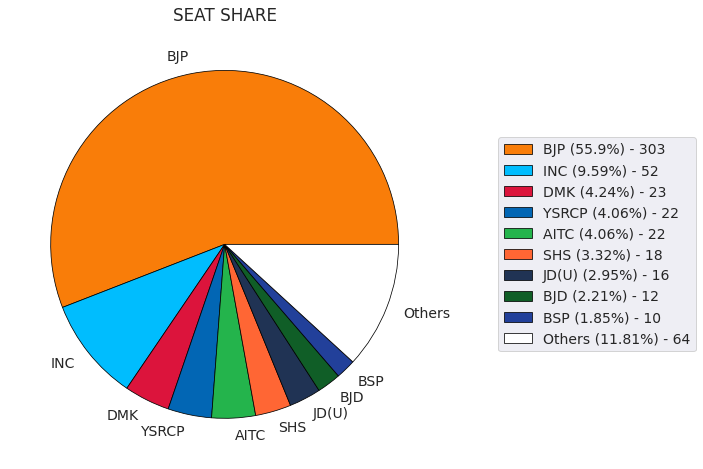

In [42]:
plt.figure(figsize = (10,8))
plt.title("SEAT SHARE")
# basic details

plt.pie(seat_distribution, labels = seat_distribution.index,
        colors = ['#f97d09', '#00bdfe', '#dc143c', '#0266b4', '#24b44c', '#ff6634', 
                                     '#203354', '#105e27', '#22409a', '#FFFFFF'],
        wedgeprops = {'edgecolor' : 'black', 'linewidth' : 0.75, 'antialiased' : True})
# pie chart created using the Data, labels, colors, and wedge border properties
# colors are customised according to each party's colors

seat_percent = round((seat_distribution/seat_distribution.sum())*100,2)
legend = seat_percent.index + " (" + seat_percent.values.astype(str) + "%) - " + seat_distribution.values.astype(str)
# the legend would the percentage seat share of each party (& others)

plt.legend(legend, loc = "right", bbox_to_anchor = (1.6,0.5));
# legend is placed outside the main chart accordingly

As we can see, the **BJP** was the single largest party with more than 50% of the seats in the House, with **INC** at a distant second.
<br> Other regional parties like **DMK**, **YSRCP**, **AITC**, **BJD** won some seats in their respective states, but no Alliance could pose as an alternative to **BJP**.

### Age
<br>
In this part we analyse the number of candidates, both contestants and winners, in each age group.

**We plot a `nested histogram` with each `bin` of size `5`**,
<br> And calculate the mean, maximum and minimum age of all candidates and winners.

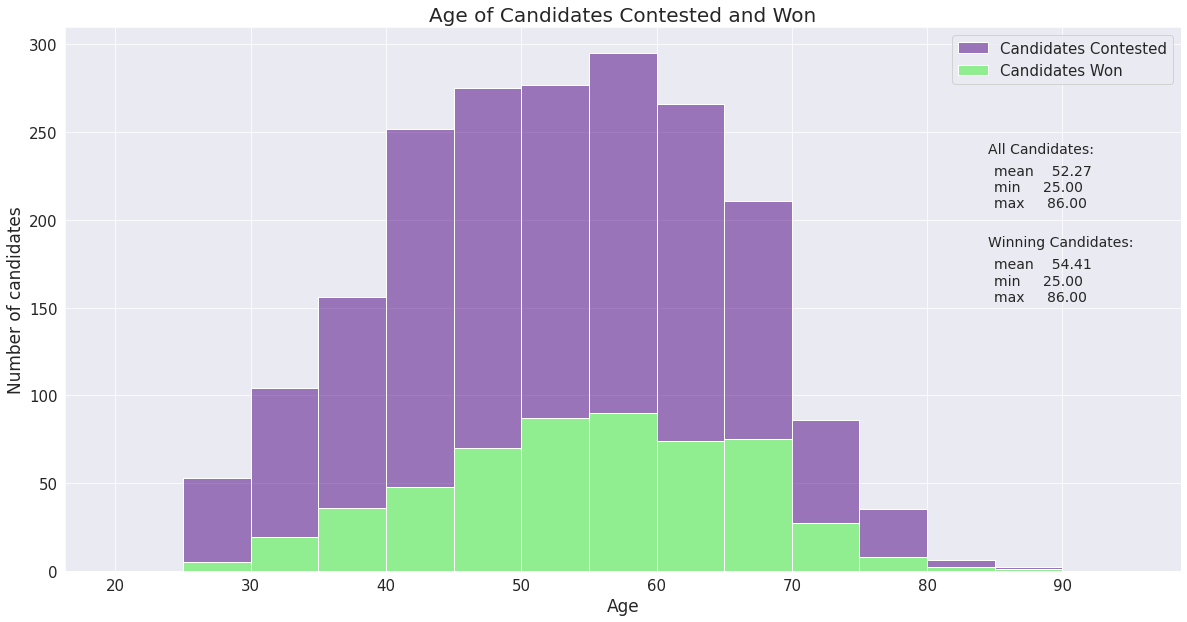

In [43]:
plt.figure(figsize = (20,10))
plt.title("Age of Candidates Contested and Won", fontsize=20)
plt.xlabel("Age", fontsize=17)
plt.ylabel("Number of candidates", fontsize=17)
# put the basic labelling

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# axes ticks size

sns.histplot(data = candidates_personal_df, x = 'AGE', bins = np.arange(20,100,5), color = 'indigo', alpha = 0.5)
sns.histplot(data = winners_df, x = 'AGE', bins = np.arange(20,100,5), color = 'lightgreen', alpha = 1)
# two histograms plotted, Won over Contested to show the relative percentage

plt.legend(["Candidates Contested", "Candidates Won"], fontsize = 15)
# legend to the plot

plt.text(84.5, 238, "All Candidates:")
plt.figtext(0.77, 0.63, round(candidates_personal_df.describe().AGE[['mean', 'min', 'max']], 2).to_string())

plt.text(84.5,185, "Winning Candidates:")
plt.figtext(0.77, 0.5, round(winners_df.describe().AGE[['mean', 'min', 'max']], 2).to_string());
# basic stats printed

As we can see from the Nested Histogram, the age group `55-60` has the maximum number of Candidates, and Winners, followed closely by the age group `50-55`. <br> The average age of the house - `54 years` also lies in this range. A majority of the winners are between the ages `45-70`, which can be considered as the normal peak years of a Politician.

In [44]:
print("Youngest Member of the House:")
winners_df[(winners_df.AGE == 25)][["NAME", "PARTY", "STATE", "CONSTITUENCY"]].reset_index(drop = True)

Youngest Member of the House:


,NAME,PARTY,STATE,CONSTITUENCY
0,Chandrani Murmu,BJD,Odisha,KEONJHAR


<img src = "https://upload.wikimedia.org/wikipedia/commons/2/2d/CHANDRANIMURMU.jpg" height = 400 width = 200>
<center>Chandrani Murmu</center>

In [45]:
print("Oldest Member of the House:")
winners_df[(winners_df.AGE == 86)][["NAME", "PARTY", "STATE", "CONSTITUENCY"]].reset_index(drop = True)

Oldest Member of the House:


,NAME,PARTY,STATE,CONSTITUENCY
0,DR. SHAFIQUR REHMAN BARQ,SP,Uttar Pradesh,SAMBHAL


### Seat Category
<br> Here we calculate the ratio of seats which have a special reservation status for candidates of different backward classes.

In [46]:
seat_category = winners_df.CATEGORY.value_counts()
# winners_df has 1 constituency only 1 time, so analysing its CATEGORY column will give the correct result

In [47]:
pd.DataFrame(seat_category)

,CATEGORY
GENERAL,400
SC,86
ST,56


**Plot the distribution as a `Pie chart`:**

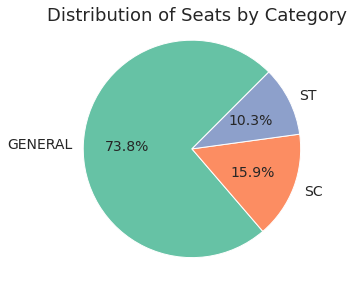

In [48]:
sns.set_palette(sns.color_palette('Set2'))
plt.figure(figsize=(8,5))
plt.title("Distribution of Seats by Category", size=18, x = 0.52, y =0.95)

plt.pie(seat_category, labels = seat_category.index, autopct = '%1.1f%%', startangle = 45);
# percentage of seats shown on the plot

As we can see, about `26%` seats in the Lok Sabha are reserved for SC and ST candidates, which is appropriate as they comprise about 25% of the population (as per the 2011 Census).

### Gender
<br> In this section we see the gender diversity of the contesting candidates, as well as the winning Members of Parliament.

**Plot the data as a horizontal bar chart.**

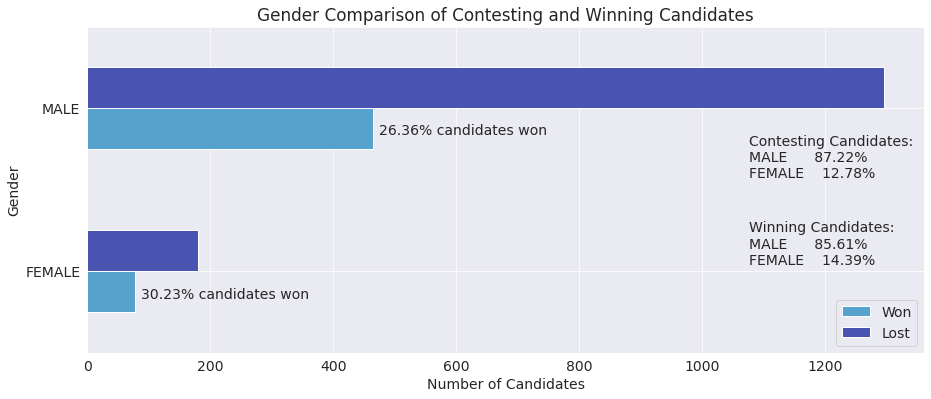

In [49]:
gender_group = candidates_personal_df.groupby(["GENDER", "WINNER"]).size()
gender_group = gender_group.unstack()
gender_group = gender_group[[1,0]]
# a2a from stack overflow

# gender with winning condition is extracted as a dataframe

sns.set_palette(sns.color_palette("icefire"))
# color palette set
gender_group.plot(kind = 'barh', figsize = (15,6), title = "Gender Comparison of Contesting and Winning Candidates")
# horizontal bar plot created with Pandas 

plt.legend(["Won", "Lost"])
plt.xlabel("Number of Candidates")
plt.ylabel("Gender")
# legend and labels set

plt.figtext(0.738,0.53, "Contesting Candidates:\n" + 
            round((candidates_personal_df.GENDER.value_counts(normalize=True)*100),2).to_string().replace("\n", "%\n")+"%")

plt.figtext(0.738,0.33, "Winning Candidates:\n" + 
            round((winners_df.GENDER.value_counts(normalize=True)*100),2).to_string().replace("\n", "%\n")+"%")

# Total candidates statistics (percentages) printed on the chart, with some applied String formatting to give the look

win_percent = round((winners_df.GENDER.value_counts()/candidates_personal_df.GENDER.value_counts())*100,2)
plt.figtext(0.395, 0.63, str(round(win_percent.MALE,2)) + "% candidates won")
plt.figtext(0.175, 0.25, str(round(win_percent.FEMALE,2))+ "% candidates won");
# percentage of winning, gender-wise printed on the chart

In [50]:
print("No. of male MPs: ", winners_df.GENDER.value_counts()["MALE"])
print("No. of female MPs: ", winners_df.GENDER.value_counts()["FEMALE"])

No. of male MPs:  464
No. of female MPs:  78


As we can see, the House has `14.4%` Female members and `85.6%` Male members. 
<br> </br>
One surprising inference we can draw from the Analysis is that despite a higher percentage of Male Candidates contesting the elections than Female (`87.2%` vs `12.8%`), the percentage of Female Contestants who won was greater than that of Male Contestants (`30.2%` vs `26.4%`).
<br> ***This means, a Female Candidate had a greater chance of winning the election than a Male Candidate.***

### Educational Qualifications
<br> Here we analyse the educational qualifications of all the Winning Candidates.

In [51]:
winners_df["EDUCATION"].unique()

array(['Graduate\nProfessional', 'Graduate', 'Doctorate', '8th Pass',
       'Post Graduate', '12th Pass', '10th Pass', 'Others', '5th Pass',
       'Illiterate', 'Literate'], dtype=object)

In [52]:
education = winners_df.EDUCATION.value_counts()
education = education.reindex(["Illiterate", "Literate", "5th Pass", "8th Pass", "10th Pass", "12th Pass", "Graduate", 
                               "Graduate\nProfessional","Post Graduate", "Doctorate", "Others"])
# arrange the Series in a systematic order

In [53]:
education

Illiterate                  1
Literate                    1
5th Pass                    4
8th Pass                   12
10th Pass                  45
12th Pass                  69
Graduate                  133
Graduate\nProfessional    101
Post Graduate             135
Doctorate                  24
Others                     17
Name: EDUCATION, dtype: int64

**Plot the data as a Bar Chart.**

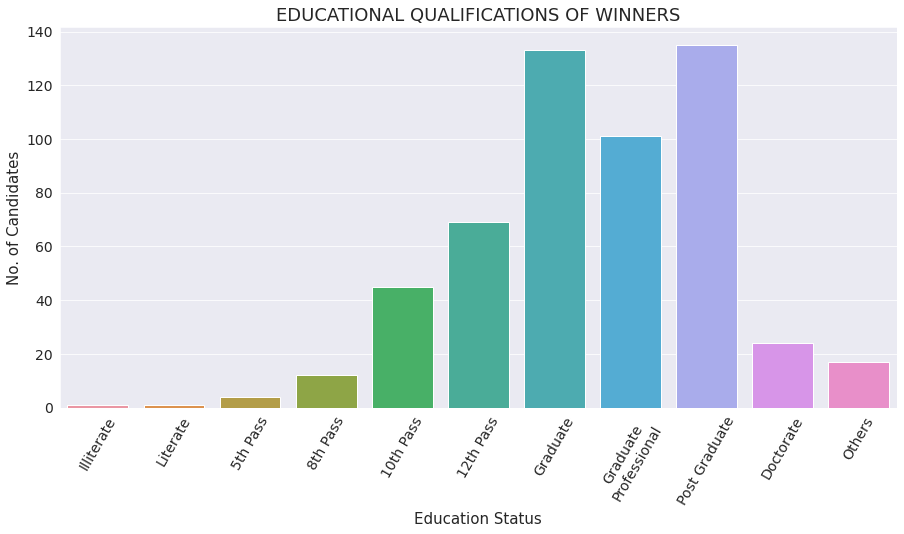

In [54]:
plt.figure(figsize=(15,7))
plt.xticks(rotation = 60);
# plot detailing

plt.xlabel("Education Status", fontsize = 15)
plt.ylabel("No. of Candidates", fontsize = 15)
plt.title("EDUCATIONAL QUALIFICATIONS OF WINNERS",fontsize = 18)
# labels and title

sns.barplot(x = education.index, y = education.values);
# plotting the barplot

We see, contrary to popular belief, most MPs are well educated and have at least a `Graduate` degree.
<br> There are less than 150 MPs who are `12th Pass` or below.

**Here we selected some specific columns of the DataFrames and performed Analysis and Visualization on those data. Now we shall move onto more complex Analysis and answering specific Questions.**

## <center>Asking and Answering Questions</center>

<img src = "https://static.theprint.in/wp-content/uploads/2019/05/Narendra-Modi-with-Amit-Shah-at-BJP-headquarters.jpg?compress=true&quality=80&w=800&dpr=1.3" width = 600 height = 400>
<center>Victorious Prime Minister Narendra Modi alongside BJP Party President Amit Shah</center>

Now we shall pose some general Election related questions, and find the answers to those using Data Analysis, and Visualize them wherever possible.

### Q1: Which States/UTs and Constituencies had the highest and the lowest Voter Turnout?

<img src = "https://cms.qz.com/wp-content/uploads/2014/04/rtr3km1z.jpg?quality=75&strip=all&w=1600&h=900&crop=1" width = 600 height = 400>
<center>Election Officers</center>

We first create a new DataFrame `votes_df` with the sum of `TOTAL VOTES` column of the `candidates_df` DataFrame and the sum of `TOTAL ELECTORS` column of the `winners_df` DataFrame, grouping them by the `STATE` and `CONSTITUENCY` columns and append the `VOTER TURNOUT` in each constituency, as a column, to the end of the DataFrame.

In [55]:
total_voters = candidates_df.groupby(["STATE", "CONSTITUENCY"])[["TOTAL VOTES"]].sum()
total_electors = winners_df.groupby(["STATE", "CONSTITUENCY"])[["TOTAL ELECTORS"]].sum()
votes_df = total_voters.join(total_electors)
votes_df["VOTER TURNOUT"] = round(votes_df["TOTAL VOTES"]/votes_df["TOTAL ELECTORS"]*100,2)

First we analyse the data to answer the second part of the question, i.e., **Which Constituencies had the highest and the lowest Voter Turnout?**

In [56]:
votes_df = votes_df.rename(index = {"Andaman & Nicobar Islands": "Andaman &\nNicobar Islands"})
# this is done purely for visualization purposes
const_turnout = votes_df.sort_values(by = ["VOTER TURNOUT"], ascending = False)
# Voter Turnout of all constituencies

high_consts = const_turnout.head(10)
low_consts = const_turnout.tail(10)
# getting the highest and the lowest Voter Outcome Constituencies

In [57]:
# Just for aesthetics

xh = high_consts.index.get_level_values(1) + "\n(" + high_consts.index.get_level_values(0) + ")"
xl = low_consts.index.get_level_values(1) + "\n(" + low_consts.index.get_level_values(0) + ")"

# the xticks are re-written accordingly to show the desired result

We now have the required answer for Constituencies. 
<br>Now we analyse the data to answer the first part of the question, i.e., **Which States/UTs had the highest and the lowest Voter Turnout?**

In [58]:
# getting the state-wise data now
states_df = votes_df.groupby("STATE").sum().drop(["VOTER TURNOUT"], axis = 1)
states_df["VOTER TURNOUT"] = round(states_df["TOTAL VOTES"]/states_df["TOTAL ELECTORS"]*100,2)
# necessary arithmetic to calculate the required Voter Turnout of all States

In [59]:
states_turnout = states_df.sort_values(by = "VOTER TURNOUT", ascending = False)
high_stat = states_turnout.head(10)
low_stat = states_turnout.tail(10)
# getting the highest and lowest Voter Outcome States

**Plot the data to show the trends in Voter Turnout for the top 10 States/UTs and Constituencies.**
<br>Here we plot 4 `Line Charts` in a Multiplot to describe the trends and answer the posed question.

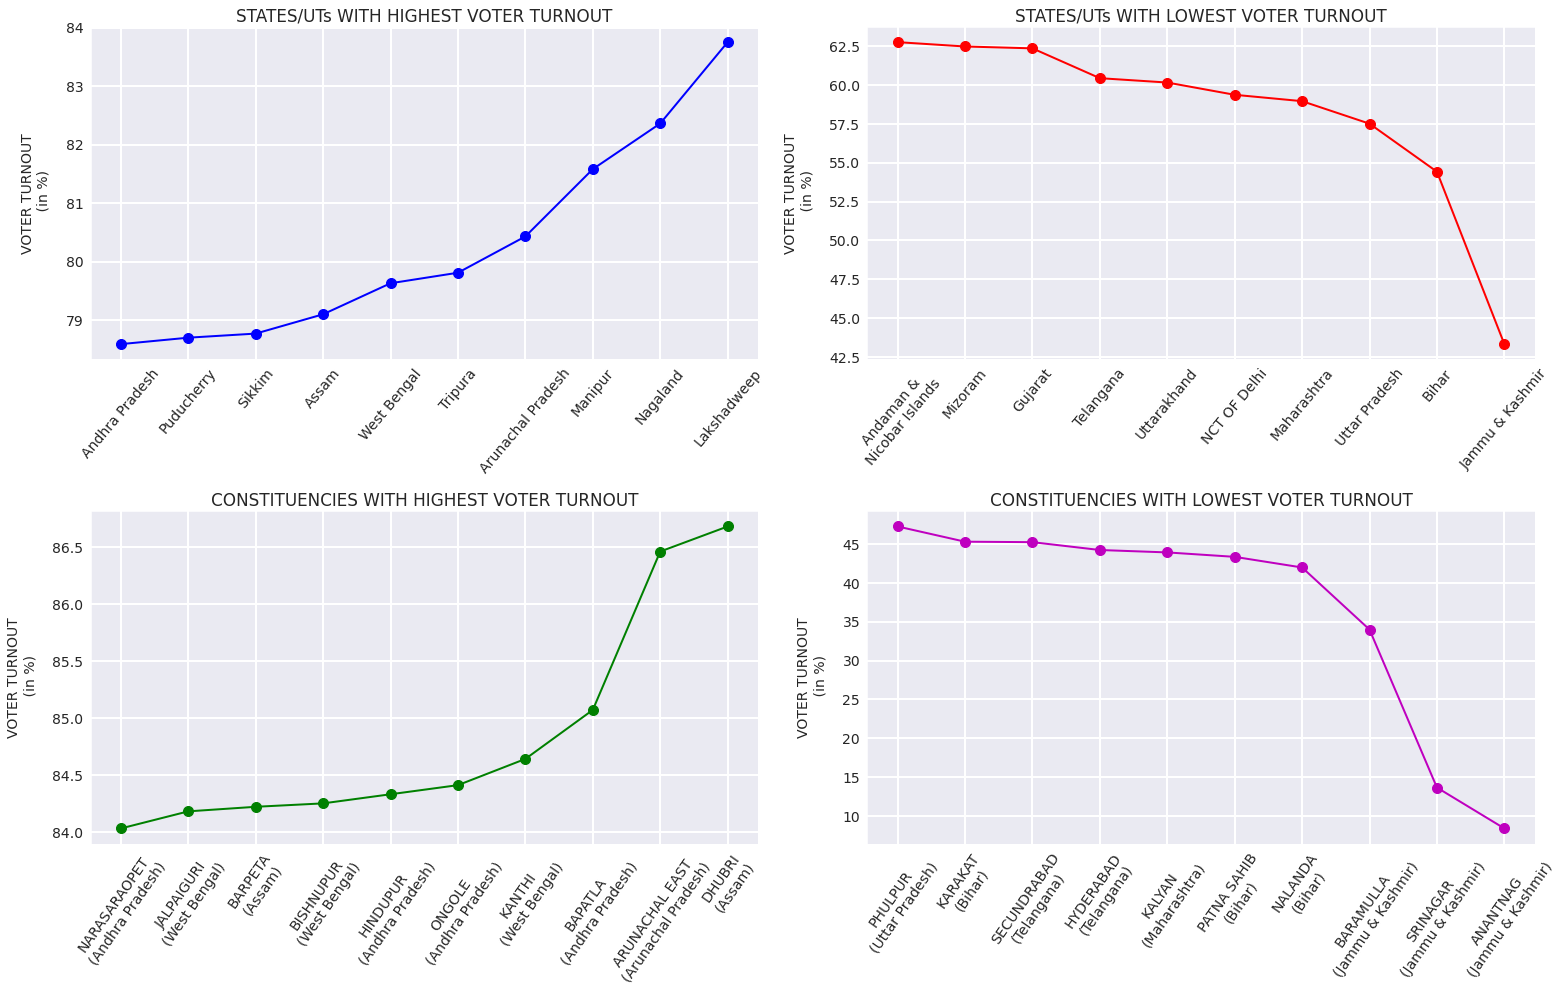

In [60]:
fig, axes = plt.subplots(2,2, figsize = (22,14))
# plot will be a subplot of 4 plots
# First row will be of States, second row of Constituencies

# Highest State Voter Outcome Plot
axes[0][0].tick_params(axis = 'x', labelrotation = 50)
axes[0][0].plot(high_stat.index[::-1], high_stat["VOTER TURNOUT"][::-1], 'b-o', linewidth = 2,
         markersize = 10)
axes[0][0].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[0][0].set_title("STATES/UTs WITH HIGHEST VOTER TURNOUT")
axes[0][0].grid(linewidth = 2)
# putting the necessary detailing and plotting, [::-1] is used to reverse the order and get an increasing graph

# Lowest State Voter Outcome Plot
axes[0][1].tick_params(axis = 'x', labelrotation = 50)
axes[0][1].plot(low_stat.index, low_stat["VOTER TURNOUT"], 'r-o', linewidth = 2,
         markersize = 10)
axes[0][1].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[0][1].set_title("STATES/UTs WITH LOWEST VOTER TURNOUT")
axes[0][1].grid(linewidth = 2)
# putting the necessary detailing and plotting

# Now the Constituencies

# Highest Consituency Voter Outcome Plot
axes[1][0].tick_params(axis = 'x', labelrotation = 55)
axes[1][0].plot(xh[::-1], high_consts["VOTER TURNOUT"][::-1], 'g-o', linewidth = 2,
         markersize = 10)
axes[1][0].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[1][0].set_title("CONSTITUENCIES WITH HIGHEST VOTER TURNOUT")
axes[1][0].grid(linewidth = 2)
# putting the necessary detailing and plotting, [::-1] is used to reverse the order and get an increasing graph

# Lowest Constituency Voter Outcome Plot
axes[1][1].tick_params(axis = 'x', labelrotation = 55)
axes[1][1].plot(xl, low_consts["VOTER TURNOUT"], 'm-o', linewidth = 2,
         markersize = 10)
axes[1][1].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[1][1].set_title("CONSTITUENCIES WITH LOWEST VOTER TURNOUT")
axes[1][1].grid(linewidth = 2)
# putting the necessary detailing and plotting

fig.tight_layout();
# to prevent overlapping of plots

In [61]:
nat_average = round(states_turnout.sum()["TOTAL VOTES"]/states_turnout.sum()["TOTAL ELECTORS"]*100,2)
print("National Voter Turnout: ", nat_average, "%", sep="")

National Voter Turnout: 65.26%


We infer from the plots, that **Lakshadweep** had the highest Voter Turnout **~87%**, while **Jammu & Kashmir** had the lowest Voter Turnout **~43%**. <br>Six North-Eastern states were in the top 10 of *Highest Voter Turnout*, whereas Kingmaker states like Uttar Pradesh, Bihar, Maharashtra, Delhi were in the top 10 of *Lowest Voter Turnout.* 
<br><br>**Dhubri in Assam** saw the Highest Voter Turnout in all of India, with about **87%** eligible voters coming out to vote, whereas **Anantnag in J&K** saw the Lowest Voter Turnout with less **10%** eligible voters casting their vote.
<br>*Andhra Pradesh, West Bengal and Assam* saw some of the best performing Constituencies in terms of Voter Turnout. On the other hand, *Telangana, Bihar and Jammu & Kashmir* having some of the poorest performing Constituencies in terms of Voter Turnout.


### Q2: How many elected MPs have a criminal record and what is their party-wise distribution?

<img src = "https://img.etimg.com/thumb/width-1200,height-900,imgsize-69524,resizemode-1,msid-65495833/news/politics-and-nation/centre-opposes-sc-suggestion-to-bar-tainted-politicians-from-polls.jpg" height = 600 width = 500>
<center>Cartoon in The Economic Times</center>

We create a new Pandas Series `crime` from the `winners_df` DataFrame containing party-wise distribution of number of MPs having at least 1 criminal case against them.

In [62]:
crime = winners_df[winners_df["CRIMINAL CASES"] != 0]['PARTY'].value_counts()
# criminal record of each party

In [63]:
crime
# party-wise distribution

BJP       117
INC        30
JD(U)      13
SHS        11
YSRCP      10
DMK        10
AITC        9
LJP         6
BSP         5
TRS         3
AIMIM       2
SP          2
IND         2
IUML        2
NCP         2
CPI(M)      2
TDP         1
JKN         1
SAD         1
AIUDF       1
VCK         1
RSP         1
AJSUP       1
ADAL        1
BJD         1
Name: PARTY, dtype: int64

In [64]:
# shortening the Series for better visualization

crime = crime[:9].append(pd.Series([crime[9:].sum()]))
# taking total 10 elements in the series
crime.rename(index = {0 : "Others"}, inplace = True)

**Plot the data as a horizontal bar chart, with the appropriate color grading.**

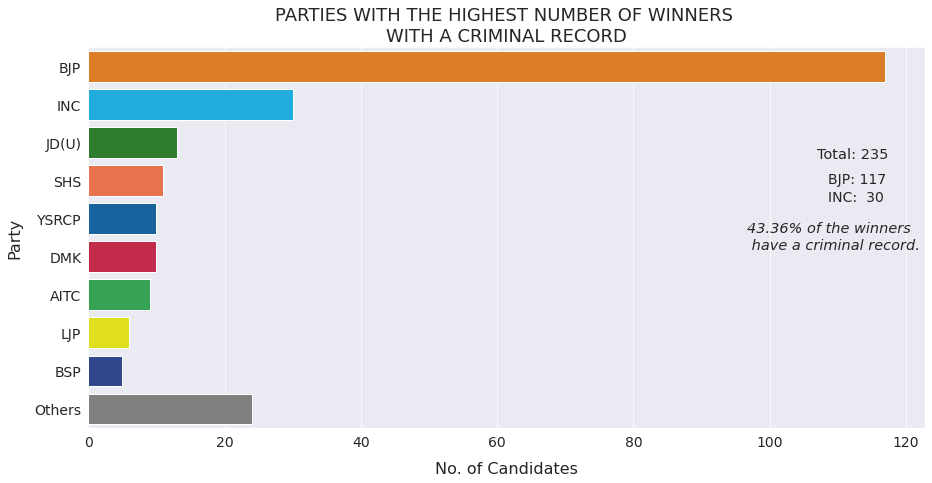

In [65]:
plt.figure(figsize = (15,7))

palette = ['#f97d09', '#00bdfe', '#228b22', '#ff6634', '#0266b4', '#dc143c', '#24b44c', 
                                      'yellow', '#22409a', 'grey']
# color palette is customized to correspond to each party's colors
sns.barplot(x = crime.values, y = crime.index, palette = sns.set_palette(palette, 10))
# the data is plotted as a horizontal bar plot

plt.title("PARTIES WITH THE HIGHEST NUMBER OF WINNERS \nWITH A CRIMINAL RECORD", fontsize = 18)
plt.ylabel("Party", fontsize = 16, labelpad = 12)
plt.xlabel("No. of Candidates", fontsize = 16, labelpad = 12)
plt.tick_params(labelsize = 14) # increase label size 
# plot detailing

plt.figtext(0.8, 0.66, "Total: " + str(crime.sum()), fontsize = 14.5)
plt.figtext(0.81, 0.61, "BJP: " + str(crime["BJP"]), fontsize = 14)
plt.figtext(0.81, 0.575, "INC:  " + str(crime["INC"]), fontsize = 14)
plt.figtext(0.735, 0.48, str(round(crime.sum()/winners_df.shape[0]*100,2))+ "% of the winners\n have a criminal record.", 
            fontsize = 14.5, style = 'oblique');
# printing details on the graph

In [66]:
# Some other stats

print(round(crime["BJP"]/seat_distribution["BJP"]*100, 2), "% BJP MPs have a criminal record.", sep = "")
print(round(crime["INC"]/seat_distribution["INC"]*100, 2), "% INC MPs have a criminal record.", sep = "")
print("Both the parties combined gave ", round(crime[["BJP", "INC"]].sum()/crime.sum()*100, 2), "% of the criminals to the House.", 
      sep = "")

38.61% BJP MPs have a criminal record.
57.69% INC MPs have a criminal record.
Both the parties combined gave 62.55% of the criminals to the House.


**BJP** and **INC** are explicitly mentioned because they are the largest parties in the house.
<br>We see, as per the popular belief, more than **40%** of the elected MPs have a criminal record. Of the two major National parties, *INC has a greater percentage of criminal MPs than BJP*.
<br> The two parties together send more than *60%* of the criminals in the House.

### Q3: What is the distribution of assets, liabilities and net worth of the elected MPs?

<img src = "https://assets.change.org/photos/4/se/cg/qGsecgtxgMbmSmO-800x450-noPad.jpg?1529660662">

We first take the `winners_df` DataFrame and append a `NET WORTH` column at the end. Then we count the number of MPs in each money interval, for the three columns- `ASSETS`, `LIABILITIES`, `NET WORTH` using a helper function- `segregate()`.

In [67]:
winners_df.insert(11, "NET WORTH", winners_df["ASSETS"] - winners_df["LIABILITIES"])
# insert a new column called "NET WORTH", which is Assets - Liabilities

In [68]:
intervals = [5e6, 1e7, 5e7, 10e7, 25e7, 50e7, 100e7]
# money intervals

assets = winners_df["ASSETS"].sort_values()
liabilities = winners_df["LIABILITIES"].sort_values()
net_worth = winners_df["NET WORTH"].sort_values()
# individual columns extracted as Series

In [69]:
# helper function
def segregate(intervals, ownings):
    '''
    Function to return a list containing number of winners in each interval.

    intervals - list containing money intervals
    ownings - DataFrame containing data which is to be segregated into groups
    '''
    l = []
#     list to store the values
    l.append(ownings[ownings<=intervals[0]].count())
#     first entry
    
    for i in range(len(intervals)-1):
        l.append(ownings[(ownings > intervals[i]) & (ownings <= intervals[i+1])].count())
#         middle entries
        
    l.append(ownings[ownings>intervals[i+1]].count())
#     last entry
    return l

We create a new DataFrame `worth_df` to store the required distribution as needed.

In [70]:
data = {"ASSETS" : segregate(intervals, assets),
        "LIABILITIES" : segregate(intervals, liabilities),
        "NET WORTH" : segregate(intervals, net_worth)}
# data generated 

worth_df = pd.DataFrame(data, index = ["<=50lac", ">50lac & <=1cr", ">1cr & <=5cr", ">5cr & <=10cr", ">10cr & <=25cr",
                           ">25cr & <=50cr", ">50cr & <=100cr", ">100cr"])
# new dataframe created

In [71]:
worth_df

,ASSETS,LIABILITIES,NET WORTH
<=50lac,36,340,44
>50lac & <=1cr,28,55,38
>1cr & <=5cr,212,91,208
>5cr & <=10cr,84,17,80
>10cr & <=25cr,90,22,89
>25cr & <=50cr,43,6,43
>50cr & <=100cr,23,7,19
>100cr,26,4,21


In [72]:
# Purely for visualization purposes

worth_df = worth_df.transpose()
# dataframe inverted for visualization purposes
worth_df.reset_index(inplace = True)
# index column added to the DataFrame

worth_df

,index,<=50lac,>50lac & <=1cr,>1cr & <=5cr,>5cr & <=10cr,>10cr & <=25cr,>25cr & <=50cr,>50cr & <=100cr,>100cr
0,ASSETS,36,28,212,84,90,43,23,26
1,LIABILITIES,340,55,91,17,22,6,7,4
2,NET WORTH,44,38,208,80,89,43,19,21


**Plot the distribution as a Stacked Bar Chart, with each of `ASSETS`, `LIABILITIES` and `NET WORTH` as a vertical column and showing different money intervals with different colors**

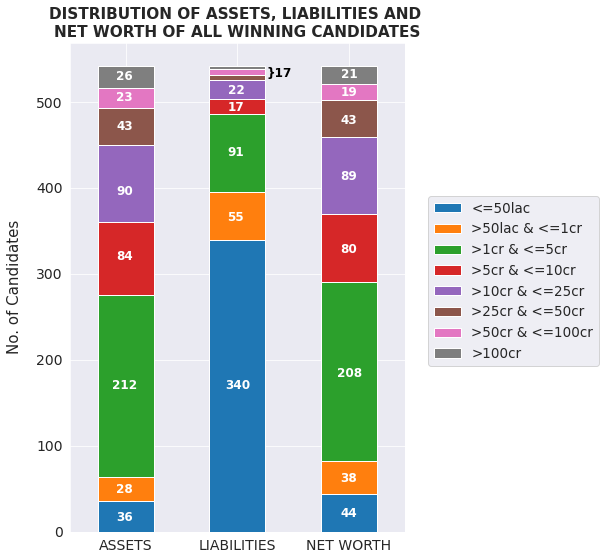

In [73]:
sns.set_palette("tab10")
# set color sequence
worth_df.plot(x = "index", kind = 'bar', stacked = True, figsize = (6,9))
# plot a Stacked Bar chart

plt.xticks(rotation = 0)
plt.tick_params(labelsize = 14)
plt.xlabel(None)
plt.ylabel("No. of Candidates", fontsize = 15, labelpad = 14)
# plot detailing

plt.title("DISTRIBUTION OF ASSETS, LIABILITIES AND \nNET WORTH OF ALL WINNING CANDIDATES", fontsize = 15.25, 
           weight = 'bold')
plt.legend(fontsize = 13.5, bbox_to_anchor = [1.05,0.7]);
# title and legend placed at appropriate positions

# for the following process of writing data on the graph, I'm sure there must be some simpler annotation method, 
# but for now, I'm using the direct printing approach

# ASSETS
plt.figtext(0.232, 0.142, worth_df.loc[0]["<=50lac"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.185, worth_df.loc[0][">50lac & <=1cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.223, 0.345, worth_df.loc[0][">1cr & <=5cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.545, worth_df.loc[0][">5cr & <=10cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.645, worth_df.loc[0][">10cr & <=25cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.745, worth_df.loc[0][">25cr & <=50cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.790, worth_df.loc[0][">50cr & <=100cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.823, worth_df.loc[0][">100cr"], color = 'white', fontsize = 12, weight = "bold");

# LIABILITIES
plt.figtext(0.485, 0.345, worth_df.loc[1]["<=50lac"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.605, worth_df.loc[1][">50lac & <=1cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.705, worth_df.loc[1][">1cr & <=5cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.775, worth_df.loc[1][">5cr & <=10cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.800, worth_df.loc[1][">10cr & <=25cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.58, 0.827, "}" + str(worth_df.loc[1][">25cr & <=50cr"]+worth_df.loc[1][">50cr & <=100cr"]+worth_df.loc[1][">100cr"]),
            color = 'black', fontsize = 12, weight = "bold");

# NET WORTH
plt.figtext(0.752, 0.148, worth_df.loc[2]["<=50lac"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.202, worth_df.loc[2][">50lac & <=1cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.743, 0.364, worth_df.loc[2][">1cr & <=5cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.555, worth_df.loc[2][">5cr & <=10cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.668, worth_df.loc[2][">10cr & <=25cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.754, worth_df.loc[2][">25cr & <=50cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.797, worth_df.loc[2][">50cr & <=100cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.825, worth_df.loc[2][">100cr"], color = 'white', fontsize = 12, weight = "bold");

In [74]:
print("Percentage of MPs with Assets >1cr = ",
      round((542-(worth_df.at[0, "<=50lac"] + worth_df.at[0, ">50lac & <=1cr"]))/542*100, 2), "%", sep = "")
print("Percentage of MPs with Net Worth >1cr = ",
      round((542-(worth_df.at[2, "<=50lac"] + worth_df.at[2, ">50lac & <=1cr"]))/542*100, 2), "%", sep = "")

Percentage of MPs with Assets >1cr = 88.19%
Percentage of MPs with Net Worth >1cr = 84.87%


We infer, as per the popular opinion, an outrageous **88.19%** of the elected MPs have Assets more than 1 crore, with *26* MPs being in the Super Rich category with more than 100 crores worth of Assets. An **84.87%** of the elected MPs have a Net Worth of more than 1 crore, with *21* of them belonging to the Super Rich category with a Net Worth of more than 100 crores.

### Q4: Which 10 constituencies saw the Most One-sided and the Closest victories respectively?

We extract a new DataFrame `candidates` from the `candidates_df` DataFrame containing only the selectively needed columns for answering the posed question.

In [75]:
candidates = candidates_df[["STATE", "CONSTITUENCY", "NAME", "WINNER", "PARTY", "TOTAL VOTES"]]
candidates = candidates[candidates.NAME != "NOTA"]
# get all the candidates

We extract only the winners and runners-up from each constituency and store the margin of victory.

In [80]:
# winners and runners_up -> temporary DataFrames

winners = candidates[candidates.WINNER == 1]
runners_up = candidates.loc[winners.index + 1]
# winners and runner ups in all seats

winners.reset_index(drop = True, inplace = True)
runners_up.reset_index(drop = True, inplace = True)
# reset index for better access

winners.drop(["WINNER"], axis = 1, inplace = True)
runners_up.drop(["WINNER"], axis = 1, inplace = True)
# drop the win indicator, we know who is who

In [81]:
# margin -> temporary DataFrame
margin = pd.DataFrame(winners["TOTAL VOTES"].to_numpy() - runners_up["TOTAL VOTES"].to_numpy(), columns = ["MARGIN OF VICTORY"])
# winning margin calculated, the order is preserved which helps us later 

In [82]:
# Some more processing done on the temporary DataFrames

winners.insert(3, "WINNER", winners["NAME"] + " (" + winners["PARTY"] + ")")
winners.drop(["NAME", "PARTY"], axis = 1, inplace = True)
winners.rename(columns = {'TOTAL VOTES' : "WINNER VOTES"}, inplace = True)
# Candidate name and Party in one column, drop the previous Name and Party columns and rename votes with winner votes

runners_up.insert(3, "RUNNER UP", runners_up["NAME"] + " (" + runners_up["PARTY"] + ")")
runners_up.drop(["NAME", "PARTY", "STATE", "CONSTITUENCY"], axis = 1, inplace = True)
runners_up.rename(columns = {'TOTAL VOTES' : "RUNNER-UP VOTES"}, inplace = True)
# Candidate name and Party in one column, drop the previous Name and Party columns and rename votes with runner-up votes
# STATE and CONSTITUENCY are dropped because they will be inherited from the 'winners' DataFrame

Now we create a new Dataframe `candidates` storing the *Winner*, *Runner-up* and *Margin of Victory* in each constituency and get the two required lists.

In [83]:
candidates = pd.concat([winners, runners_up, margin], axis = 1)
# the winners DataFrame and runners_up DataFrame are joined by the columns

In [84]:
lowest_margin = candidates.sort_values(by = "MARGIN OF VICTORY").head(10)
highest_margin = candidates.sort_values(by = "MARGIN OF VICTORY", ascending = False).head(10)
# get the 2 lists

In [85]:
# purely for aesthetics

lowest_margin.insert(2, "PLACE", lowest_margin.CONSTITUENCY + " (" + lowest_margin.STATE + ")")
lowest_margin.drop(["STATE", "CONSTITUENCY"], inplace = True, axis = 1)
lowest_margin.rename(columns = {"PLACE" : "CONSTITUENCY"}, inplace = True)
lowest_margin.index = np.arange(1,11)

# do some styling on both DataFrames for visual purposes

highest_margin.insert(2, "PLACE", highest_margin.CONSTITUENCY + " (" + highest_margin.STATE + ")")
highest_margin.drop(["STATE", "CONSTITUENCY"], inplace = True, axis = 1)
highest_margin.rename(columns = {"PLACE" : "CONSTITUENCY"}, inplace = True)
highest_margin.index = np.arange(1,11)

 **The constituencies with the most one-sided victories:**

In [86]:
highest_margin

,CONSTITUENCY,WINNER,WINNER VOTES,RUNNER UP,RUNNER-UP VOTES,MARGIN OF VICTORY
1,NAVSARI (Gujarat),C. R. Patil (BJP),972739,PATEL DHARMESHBHAI BHIMBHAI (INC),283071,689668
2,KARNAL (Haryana),Sanjay Bhatia (BJP),911594,Kuldip Sharma (INC),255452,656142
3,FARIDABAD (Haryana),KRISHAN PAL (BJP),913222,AVTAR SINGH BHADANA (INC),274983,638239
4,BHILWARA (Rajasthan),SUBHASH CHANDRA BAHERIA (BJP),938160,RAM PAL SHARMA (INC),326160,612000
5,VADODARA (Gujarat),RANJANBEN BHATT (BJP),883719,PRASHANT PATEL (TIKO) (INC),294542,589177
6,WEST DELHI (NCT OF Delhi),PARVESH SAHIB SINGH VERMA (BJP),865648,MAHABAL MISHRA (INC),287162,578486
7,CHITTORGARH (Rajasthan),Chandra Prakash Joshi (BJP),982942,Gopal Singh Shekhawat (INC),406695,576247
8,GANDHINAGAR (Gujarat),AMIT SHAH (BJP),894624,Dr. C. J. CHAVDA (INC),337610,557014
9,NORTH WEST DELHI (NCT OF Delhi),HANS RAJ HANS (BJP),848663,GUGAN SINGH (AAP),294766,553897
10,HOSHANGABAD (Madhya Pradesh),UDAY PRATAP SINGH (BJP),877927,SHAILENDRA DIWAN CHANDARBHAN SINGH (INC),324245,553682


We see from the table, as has been the case for most of the election, all 10 winners on the list are from **BJP**, while 9 of the 10 runners-up are from **INC**. 
<br>As we can infer from the table, *Gujarat*, *Haryana*, *Rajasthan* and *NCT of Delhi* saw the most one-sided contests.</br>
<br>**C.R. Patil** won by a record margin of more than *6.89 lakh* votes from Navsari, Gujarat. BJP National President and future Home Minister **Amit Shah** won by more than *5.5 lakh* votes from Gandhinagar, Gujarat.

<img src = "https://www.indiancooperative.com/wp-content/uploads/2021/09/cr-patil.jpg" height = 600 width = 400>
<center>C.R. Patil<center>

 **The constituencies with the closest victories:**

In [87]:
lowest_margin

,CONSTITUENCY,WINNER,WINNER VOTES,RUNNER UP,RUNNER-UP VOTES,MARGIN OF VICTORY
1,MACHHLISHAHR (Uttar Pradesh),Bholanath (B.P. Saroj) (BJP),488397,Tribhuvan Ram (T.Ram) (BSP),488216,181
2,LAKSHADWEEP (Lakshadweep),MOHAMMED FAIZAL PP (NCP),22851,HAMDULLAH SAYEED (INC),22028,823
3,ARAMBAGH (West Bengal),APARUPA PODDAR (AFRIN ALI) (AITC),649929,TAPAN KUMAR RAY (BJP),648787,1142
4,ANDAMAN & NICOBAR ISLANDS (Andaman & Nicobar I...,KULDEEP RAI SHARMA (INC),95308,VISHAL JOLLY (BJP),93901,1407
5,KHUNTI (Jharkhand),ARJUN MUNDA (BJP),382638,KALI CHARAN MUNDA (INC),381193,1445
6,JAHANABAD (Bihar),CHANDESHWAR PRASAD (JD(U)),335584,SURENDRA PRASAD YADAV (RJD),333833,1751
7,CHAMARAJANAGAR (Karnataka),V. SRINIVAS PRASAD (BJP),568537,R. DHRUVANARAYANA (INC),566720,1817
8,BARDHAMAN DURGAPUR (West Bengal),S.S AHLUWALIA (BJP),598376,DR. MAMTAZ SANGHAMITA (AITC),595937,2439
9,CHIDAMBARAM (Tamil Nadu),THIRUMAAVALAVAN THOL (VCK),500229,CHANDRASEKAR P (AIADMK),497010,3219
10,KORAPUT (Odisha),SAPTAGIRI SANKAR ULAKA (INC),371129,KAUSALYA HIKAKA (BJD),367516,3613


Compared to the table of the most One-Sided victories, the table of Closest victories consists of many different contests and in different regions of the country. 
<br></br>Island seats of Lakshadweep and Andaman & Nicobar Islands saw the 2nd and 4th most competitive contests with a margin of victory of *823* votes and *1407* votes respectively.
<br>**B.P. Saroj** of **BJP** won the closest victory over **Tribhuvan Ram** of **BSP** with *181* votes in Machhlishahr, Uttar Pradesh.

### Q5: What is the region-wise distribution of seats across the country?

The first thing we need to do here is to divide the States and UTs into various regions. This is done using a dictionary `India`.

In [88]:
winners_df.STATE.unique()
# get the names of the States

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'NCT OF Delhi', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [89]:
India = {'NORTH INDIA': ['Jammu & Kashmir', 'Himachal Pradesh', 'Punjab', 'Haryana', 'Uttarakhand', 'NCT OF Delhi', 'Chandigarh'],
         'CENTRAL INDIA': ['Uttar Pradesh', 'Madhya Pradesh', 'Chhattisgarh'],
         'WEST INDIA': ["Gujarat", "Rajasthan", "Maharashtra", "Goa", "Dadra & Nagar Haveli", "Daman & Diu"],
         'SOUTH INDIA': ['Karnataka', 'Andhra Pradesh', 'Telangana', 'Kerala', 'Tamil Nadu', 'Puducherry', 'Lakshadweep'],
         'EAST INDIA': ["Bihar", "Jharkhand", "West Bengal", "Odisha", "Andaman & Nicobar Islands"], 
         'NORTH-EAST INDIA': ['Assam', 'Arunachal Pradesh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Sikkim', 'Tripura']}

# group the states into 6 regions

Now all the constituencies need to be segregated into their respective regions.
<br> We extract the `STATE`, `CONSTITUENCY` and `PARTY` columns from the `winners_df` DataFrame and segregate the various seats into different regions using the `extracted` columns and storing them in the `dist` dictionary.

In [90]:
extracted = winners_df[["STATE", "CONSTITUENCY", "PARTY"]]
# Using this extracted columns from the winners DataFrame, we create a new dictionary, with Region names being the keys and 
# respective seats DataFrame being the values, which is filled below in O(36)

dist = {}
# dictionary storing region-wise Distribution of seats

for region in India.keys():
#     for each region in India
    for state in India[region]:
#         for each state in a region
        temp = extracted[extracted.STATE == state]
#     get a DataFrame with the entries with the current State
        if region not in dist.keys():
            dist[region] = temp
        else:
            dist[region] = dist[region].append(temp)
#     append the DataFrame to the current DataFrame in that region in the dictionary

Now `dist` is a Dictionary which has Region names as its `keys`, with each key having the Seat Distribution of the States/UTs, as a Dataframe, in the corresponding region.

In [91]:
dist.keys()

dict_keys(['NORTH INDIA', 'CENTRAL INDIA', 'WEST INDIA', 'SOUTH INDIA', 'EAST INDIA', 'NORTH-EAST INDIA'])

Now we need to maintain 2 dictionaries - `plot_seats_data` and `plot_percent_data`.
>`plot_seats_data` contains the region-wise distribution of seats in a State vs Party format.
> <br>`plot_percent_data` contains the region-wise distribution of seat percentages in a State vs Party format.
> </br>
> <br>`plot_seats_data` will be used for printing the data on the graphs.
> <br>`plot_percent_data` will be used for plotting the data as a stacked graph.

In [92]:
plot_seats_data = {}
plot_percent_data = {}

# The 2 dictionaries are filled simultaneously
for region in dist.keys():
#     getting the number of seats
    seats = pd.DataFrame(dist[region].groupby("STATE")["PARTY"].value_counts())
    seats.rename(columns = {"PARTY" : "SEATS"}, inplace = True)
    seats.reset_index(inplace = True)
    
#     getting the seats percent, this will be plotted
    values = pd.DataFrame(dist[region].groupby("STATE")["PARTY"].value_counts(normalize=True)*100)
    values.rename(columns = {"PARTY" : "SEAT PERCENT"}, inplace = True)
    values.reset_index(inplace = True)
    
#     creating the needed table for each region
    parties = dist[region]["PARTY"].nunique()
    # number of winning parties in the region
    states = dist[region]["STATE"].nunique()
    # number of states in the region

    seat_num = pd.DataFrame(np.zeros((parties, states)))
#     create empty DataFrame of required size

    seat_num.index = dist[region]["PARTY"].unique()
    seat_num = seat_num.T
    seat_num.index = np.sort(dist[region]["STATE"].unique())
    # format the empty DataFrame to give it the required look
    
    seat_percent = seat_num.copy()
#     this is similar to seat_num, only that it'll contain the percent of seats won and not the exact number


# THIS IS THE FILLING OF SEATS IN seat_num DATAFRAME

    for state in seats.STATE.unique():
#     for every state in the region
        for party in seat_num.columns:
#         check with every party in the region
            seat_num.at[state, party] = seats[(seats.STATE == state) &(seats.PARTY == party)]["SEATS"].sum()
#         as the final DataFrame is only of 1 cell, taking .sum() gives just that value as it is

# THIS IS THE FILLING OF SEAT PERCENT IN seat_percent DATAFRAME

    for state in values.STATE.unique():
#     for every state in the region
        for party in seat_percent.columns:
#         check with every party in the region
            seat_percent.at[state, party] = values[(values.STATE == state) &(values.PARTY == party)]["SEAT PERCENT"].sum()
#         as the final DataFrame is only of 1 cell, taking .sum() gives just that value as it is


# As BJP and INC are the 2 main parties, we keep them at the beginning always
    index = ["BJP", "INC"] + list(seat_num.columns.drop(["BJP", "INC"]))
    seat_num = seat_num[index]
    seat_percent = seat_percent[index]  
    
# BELOW CALCULATION IS DONE FOR CALCULATING THE TOTAL SEATS WON, AND TOTAL SEAT WIN PERCENTAGE OF A PARTY IN A REGION

    party_seats = seat_num.sum()
#     no. of seats won by each party in the region (column-wise sum)
    state_seats = seat_num.sum(axis=1)
#     no. of seats in each state (row-wise sum)
    total_percent = (party_seats/state_seats.sum())*100
#     percentage of seats won by a party in the region
    seat_percent = seat_percent.append(total_percent.rename("Total"))
#     this is the winning percentage of each party in this region, added to the DataFrame which will be plotted

    seat_num.loc["Total"] = seat_num.sum()
    seat_num["TOTAL"] = seat_num.sum(axis=1)
#     total seats of each party and of each state added to the seats DataFrame (for printing on plot)
    
#     This is the final reshaping of the DataFrame before it is stored and used for plotting
    
    seat_percent.reset_index(inplace = True)
    seat_percent.rename(columns = {'index' : "STATE"}, inplace = True)
    seat_percent = seat_percent.iloc[::-1]
    
#     Storing the two DataFrames in Dictionaries
    plot_seats_data[region] = seat_num
    plot_percent_data[region] = seat_percent

Let's see how each DataFrame looks by taking an example in the `plot_seats_data` dictionary, with the key `"CENTRAL INDIA"`.

In [93]:
plot_seats_data["CENTRAL INDIA"]

,BJP,INC,BSP,SP,ADAL,TOTAL
Chhattisgarh,9.0,2.0,0.0,0.0,0.0,11.0
Madhya Pradesh,28.0,1.0,0.0,0.0,0.0,29.0
Uttar Pradesh,62.0,1.0,10.0,5.0,2.0,80.0
Total,99.0,4.0,10.0,5.0,2.0,120.0


As mentioned before, we have the number of Seats arranged in a State vs Party format.<br>
Similarly `plot_percent_data` has the Seat Percentages arranged in a State vs Party format.

As each party as a characteristic color code, it would be better to have color coding for each Party in the Visualization process for easier interpretation.

In [94]:
# dictionary containing color codes for each National and Regional Party which won at least 1 seat
party_colors = {'BJP': "#f97d09", 'INC': "#00bdfe", 'AITC': "#32cd32", 'BSP': "#22409a", 'SP': "#fe0000", 'DMK': "#000000", 
                'YSRCP': "#0266b4", 'SHS': "#ff6634", 'AAP': "#2e5984", 'JKN': "#ff0000", 'SAD': "#000080", 'RLTP': "#e0dd14",
                'AIMIM': "#20783b", 'NCP': "#20b2aa", 'IND': "#a9a9a9", 'ADAL': "#8f00ff", 'JD(U)': "#00264d", 'LJP' : "#2595d4",
                'AJSUP': "#a32a70", 'JMM': "#004b1f", 'BJD': "#008717", 'AIUDF': "#00ff00", 'NPF': "#28166f", 'NPEP': "#db4874",
                'MNF': "#1e3f66", 'NDPP': "#ed2939", 'SKM': "#b6850d", 'JD(S)': "#00923f", 'TDP': "#ffff00", 'TRS': "#fe0175",
                'CPI(M)': "#de0000", 'RSP': "#65350f", 'KEC(M)': "#e8cb0e", 'IUML': "#006600", 'VCK': "#6332cd", 'AIADMK': "#32cd32"
               }

In [95]:
# Helper function
def colors(parties):
    '''
    Function to return the color scheme according to the parties in the region
    
    parties - list of party names
    '''
    col = []
    for party in parties:
        col.append(party_colors[party])
#         for each party, return its corresponding color code from the dictionary
    return col

The dictionary `party_colors` and function `colors()` helps in easy creation of color palettes for each Region, based on the order of Parties present in that region.

**Plot the DataFrame `plot_percent_data` on a Multiplot of Stacked horizontal bar charts.**

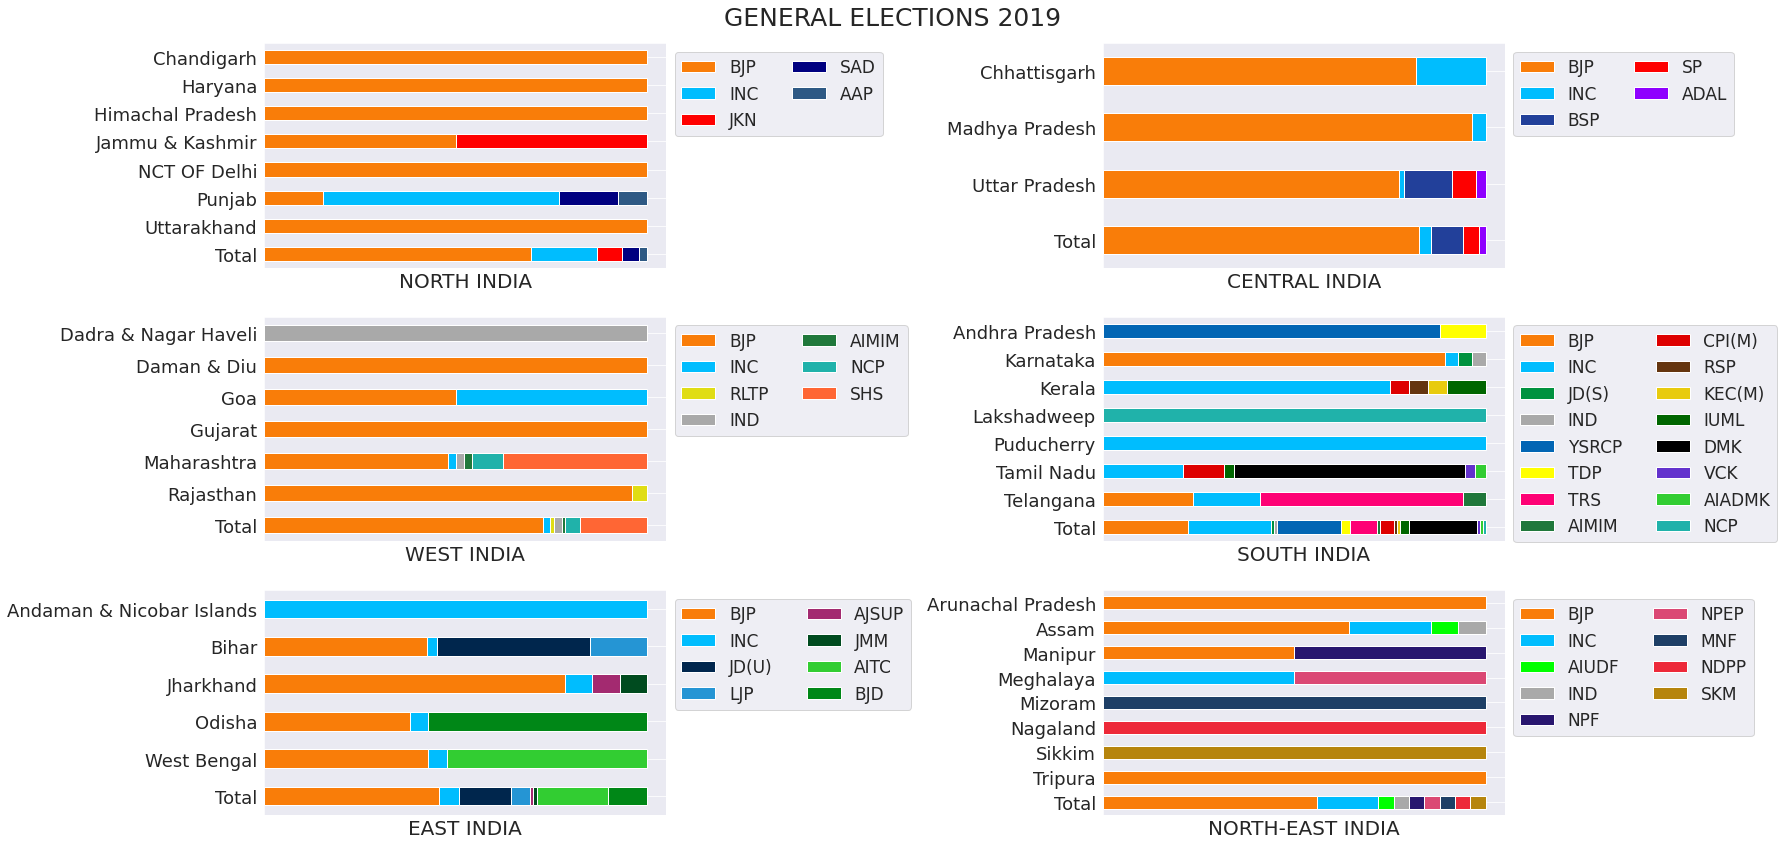

In [96]:
fig, axes = plt.subplots(3,2)
# plot will be a subplot of 6 plots

i = 0 # row index
j = 0 # column index

fig.suptitle("GENERAL ELECTIONS 2019", fontsize = 25)
# title for the entire Multiplot

for region in plot_percent_data.keys():
#     for each region
    data = plot_percent_data[region]
#     take the corresponding seat percent DataFrame

    data.plot(ax = axes[i,j], x = "STATE", kind = "barh", stacked = True, figsize = (25, 12),
                                      color = colors(data.columns[1:]))
#     plot the stacked distribution 

    axes[i,j].legend(bbox_to_anchor = [1,1], fontsize = 17, ncol = 2)
    axes[i,j].xaxis.set_ticks([])
    axes[i,j].set_xlabel(region, fontsize = 20)
    axes[i,j].tick_params(labelsize = 18)
    axes[i,j].set_ylabel("")
#     style the subplots

#   subplot choosing condition
    j += 1
    if j == 2:
        j = 0
        i += 1

fig.tight_layout();
# to prevent overlapping of plots

We can infer from the plots that **Central India** and **West India** were the strongholds of *BJP* whereas **South India** and **East India** were the regions where *BJP* struggled against regional parties like *DMK*, *YSRCP*, *AITC* and *BJD*. In **North India** and **North-East India**, *BJP* was the largest party, but it faced some opposition from regional parties and *INC*. 
<br></br>*INC* saved some face in some **South Indian** states like Kerala and Tamil Nadu, and in Punjab in **North India**, but had a dismal performance in rest of the country.

<img src = "https://img.republicworld.com/republic-prod/stories/promolarge/xhdpi/uzm3ttb8h7emu7ix_1572693406.jpeg" height = 600 width = 500>
<center>‘Sabka Saath, Sabka Vikas, Sabka Vishwas’ – meaning ‘Together, for everyone’s growth, with everyone’s trust’</center>
<center>Slogan given Prime Minister Modi ahead of the Polls</center>

***The plots above don't give much information about individual party in each state.<br>
So we shall plot them again, this time maximizing the size of each plot and printing the information in `plot_seats_data` onto the plots.***

> * As you're about to see, instead of using a function to print each plot, each 2-by-1 multiplot has its own data coordinates array and data printing loops. <br>
> * This is done to get a desired output which isn't too crammed and easy to read from. <br>
> * Attempts shall be made later on to optimise the code.<br>

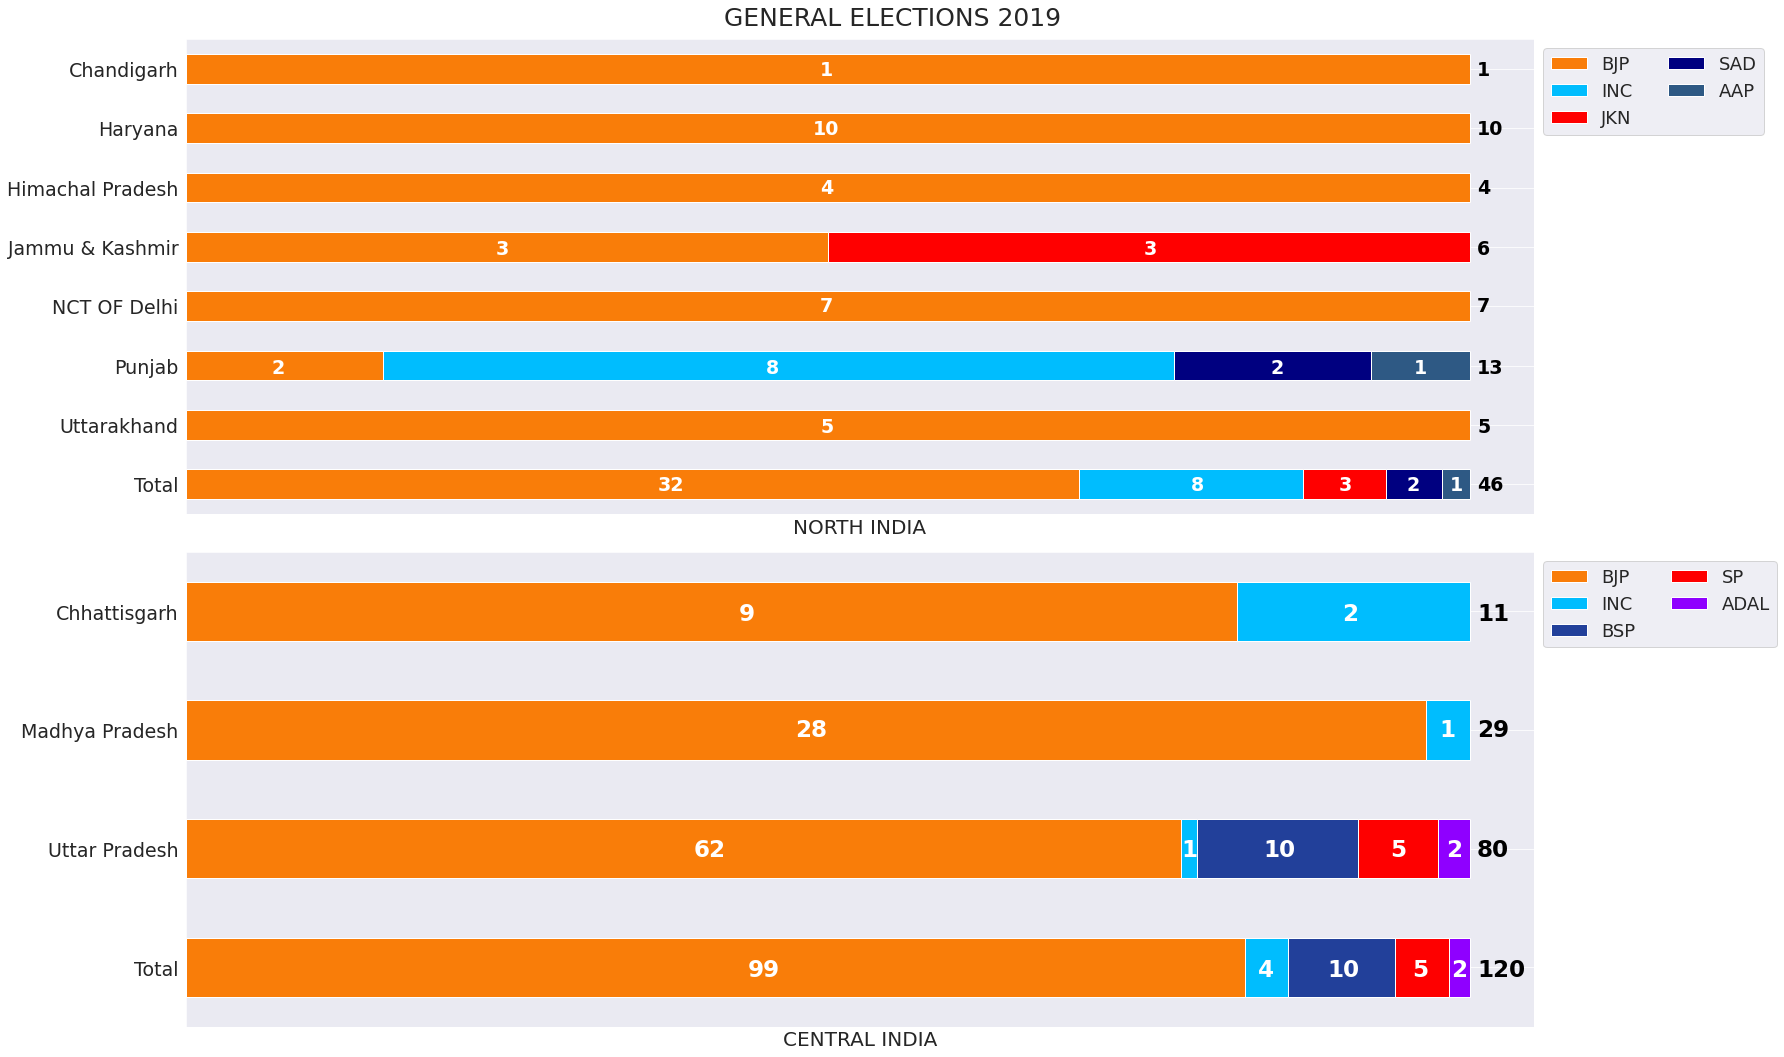

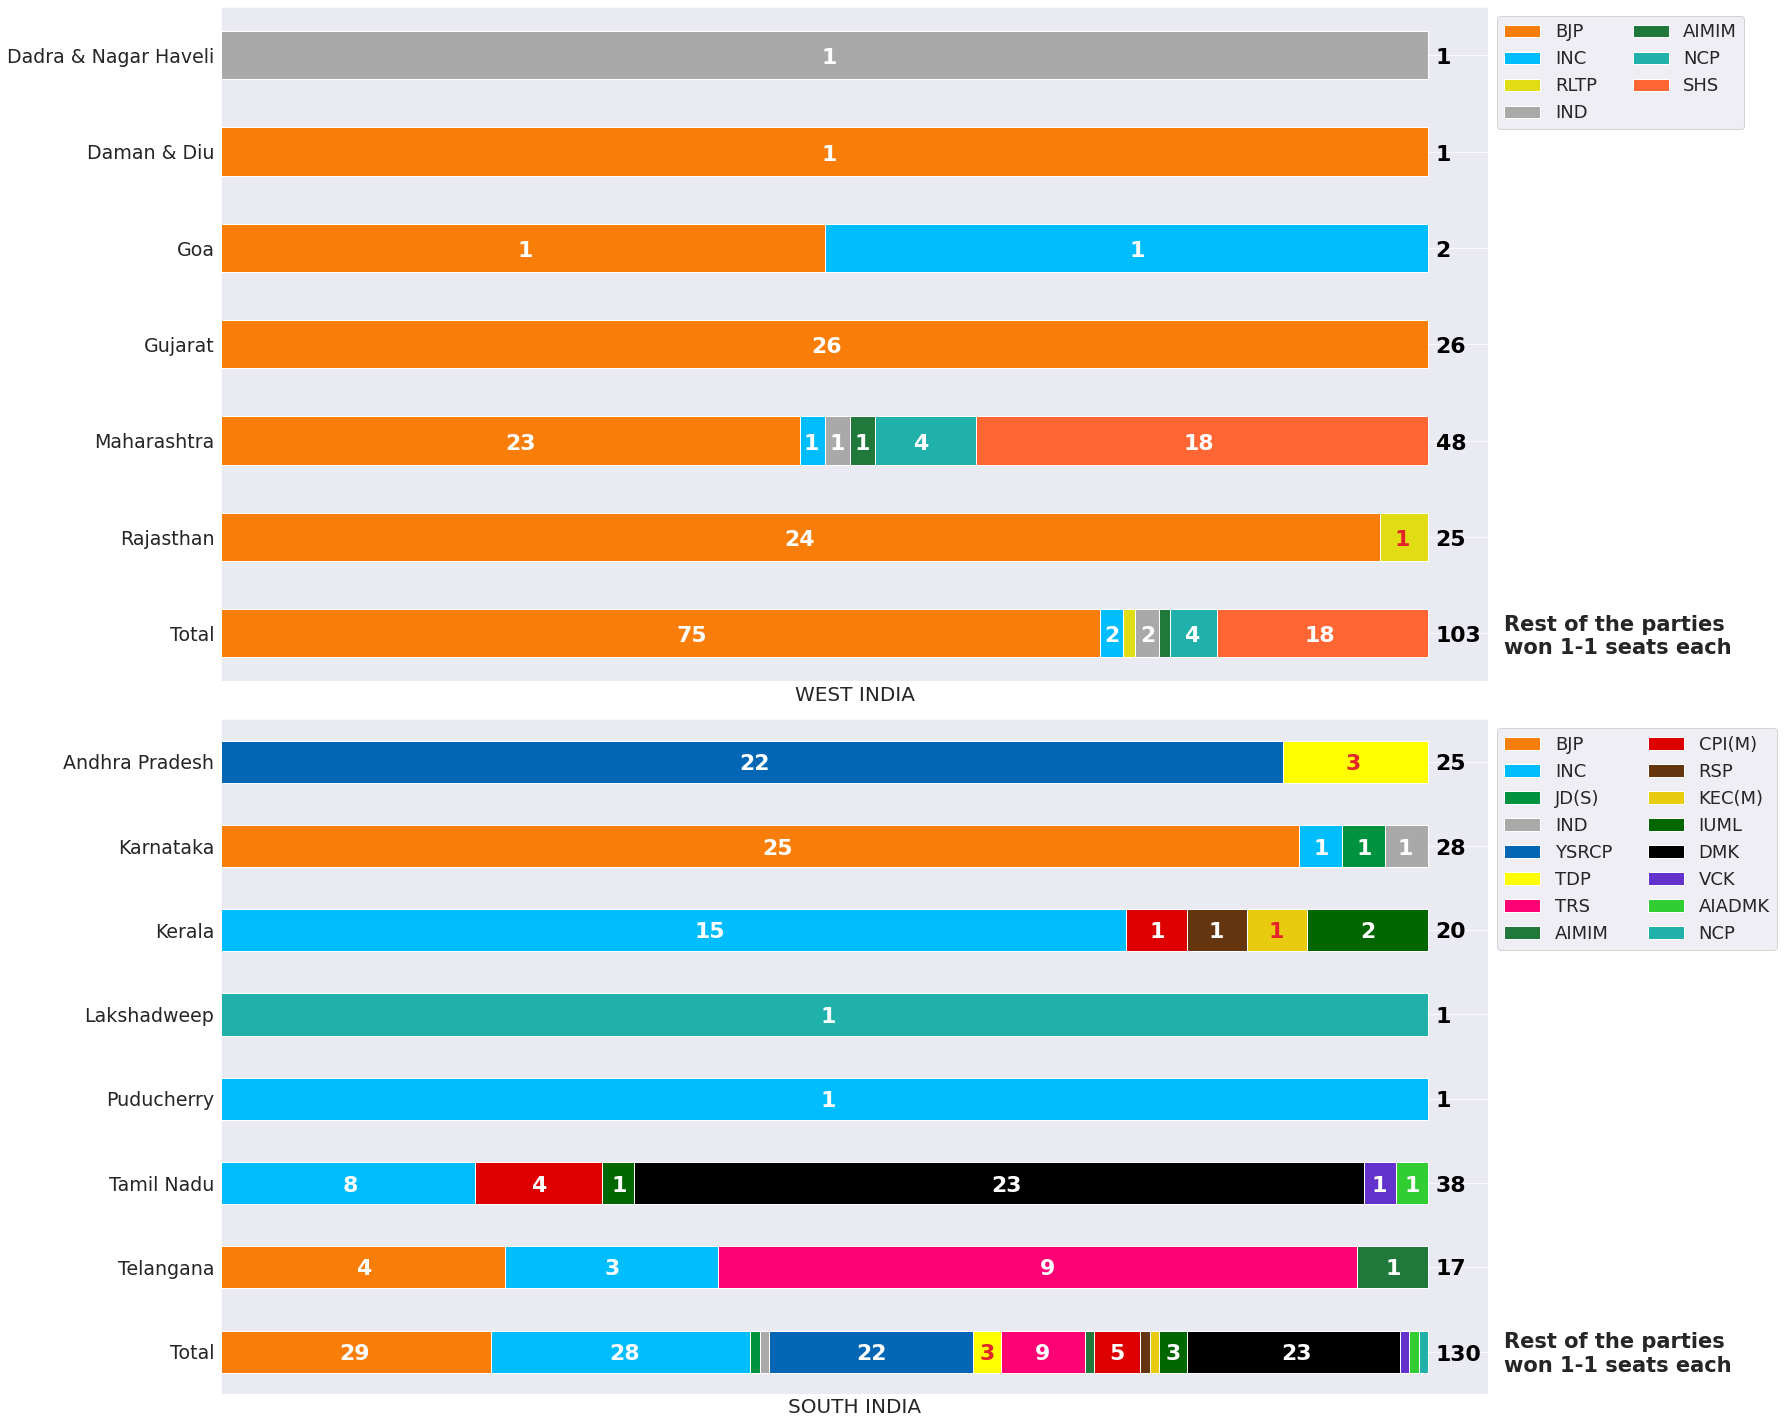

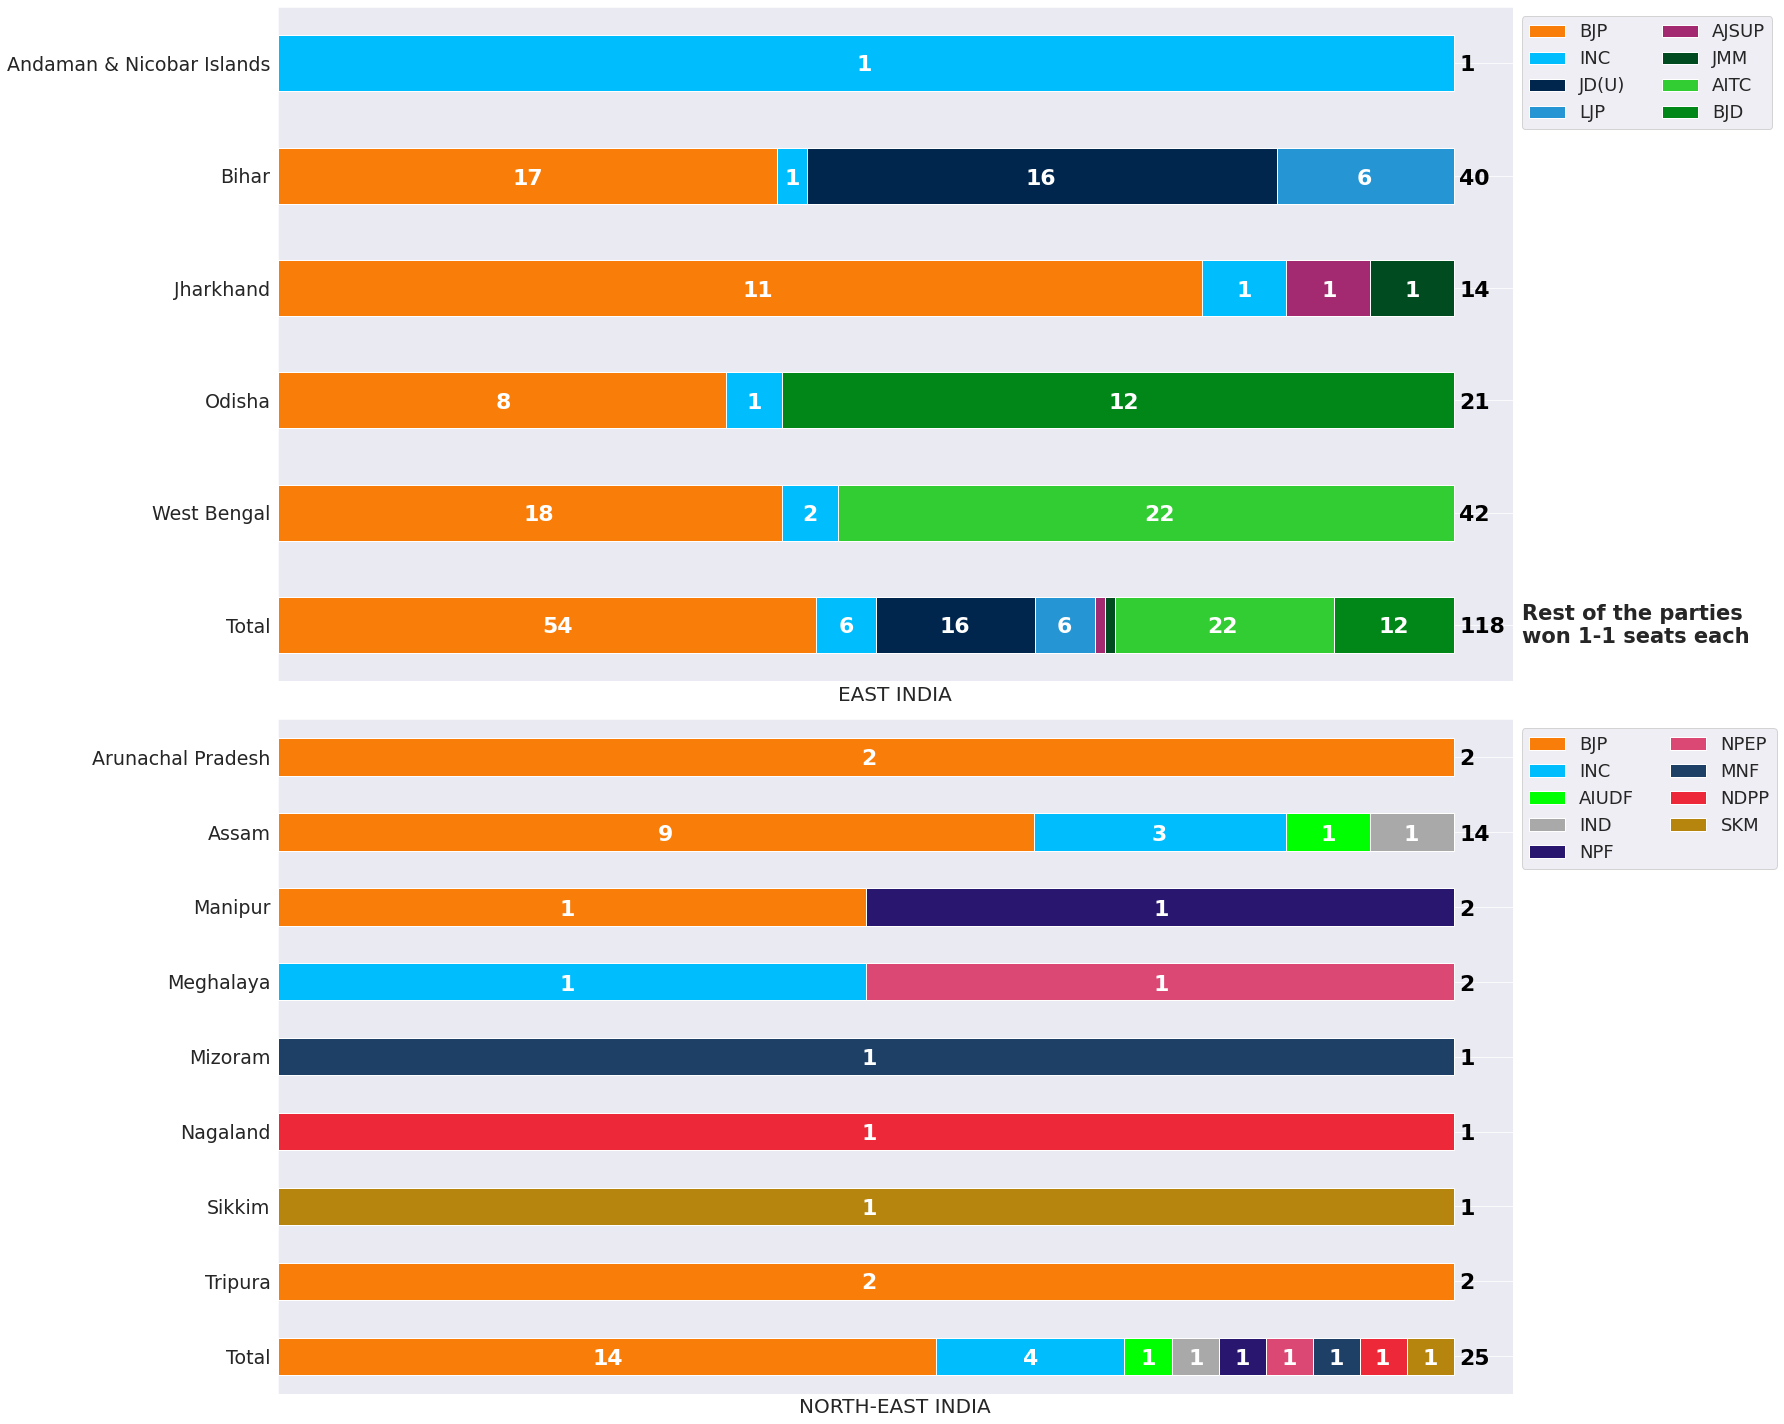

In [97]:
# TO BETTER UTILISE THE SPACE, WE TAKE 3 MULTIPLOTS, EACH OF 2-2 REGIONS

fig, axes = plt.subplots(2,1)
# first 2 regions

fig.suptitle("GENERAL ELECTIONS 2019", fontsize = 25)
# title for the entire Multiplot

i = 0
# for plotting the 2 regions

# PLOT THE TWO SUBPLOTS FOR THE FIRST 2 REGIONS
for region in list(plot_percent_data.keys())[:2]:
#     for each region
    data = plot_percent_data[region]
#     take the corresponding seat percent DataFrame

    data.plot(ax = axes[i], x = "STATE", kind = "barh", stacked = True, figsize = (25, 15),
                                      color = colors(data.columns[1:]))
#     plot the stacked distribution 

    axes[i].legend(bbox_to_anchor = [1,1], fontsize = 18, ncol = 2)
    axes[i].xaxis.set_ticks([])
    axes[i].set_xlabel(region, fontsize = 20)
    axes[i].tick_params(labelsize = 19)
    axes[i].set_ylabel("")
#     style the subplots

    i += 1

fig.tight_layout();
# to prevent overlapping of plots

# BELOW PROCEDURE IS FOR DATA PRINTING ON THE SUBPLOTS

# x coordinates of first region
reg1x = [0.460,                             0.825, 
         0.456,                             0.825,
         0.460,                             0.825,
         0.280, 0.640,                      0.825,
         0.460,                             0.825,
         0.155, 0.430, 0.710, 0.790,        0.825,
         0.460,                             0.825,
         0.370, 0.666, 0.748, 0.786, 0.810, 0.825]

# y coordinates of first region
reg1y = [0.916,                             0.916, 
         0.862,                             0.862, 
         0.807,                             0.807,
         0.751, 0.751,                      0.751,
         0.698,                             0.698,
         0.640, 0.640, 0.640, 0.640,        0.640, 
         0.586,                             0.586,
         0.532, 0.532, 0.532, 0.532, 0.532, 0.532]

# x coordinates of second region
reg2x = [0.415, 0.750,                        0.825,
         0.446, 0.804,                        0.825,
         0.390, 0.6605, 0.706, 0.777, 0.808,  0.825,
         0.420, 0.703,  0.742, 0.789, 0.8105, 0.825]

# y coordinates of second region
reg2y = [0.412, 0.412,                      0.412,
         0.304, 0.304,                      0.304,
         0.193, 0.193, 0.193, 0.193, 0.193, 0.193,
         0.082, 0.082, 0.082, 0.082, 0.082, 0.082]

regx = [reg1x, reg2x]
regy = [reg1y, reg2y]
# combining the two sets for easy access

i = 0
j = 0
# i is for the current plot
# j is for the current number (of seats) to be printed from the plot_seats_data dictionary

color = "white"
# default color of the text to be printed

# THIS PRINTS ALL THE SEAT VALUES ONTO THE SUB-PLOTS
for region in list(plot_seats_data.keys())[:2]:
# for each region in the list 
    seats = plot_seats_data[region]
#     take the corresponding number of seats DataFrame
    j = 0
#     initialise j for each plot
    for state in seats.index:
#         for each state in the region
        for party in seats.keys():
#         for each party in the State
            color = "white" # default color
            text = seats.loc[state, party]
            if(text != 0):
                if party == "TOTAL" :
                    color = "black"
                plt.figtext(regx[i][j], regy[i][j], int(text), color = color, weight = "bold", fontsize = 19+4*i);
#     print the int(text) at the required position taken from the matrices, with some styling and color
                j += 1
#     go to the next item in the index matrices
                
    i += 1  # go to the next index matrix

'''
----------------------------------------------------------------------------------------------------------------------------- 
'''

# FOR THE NEXT TWO REGIONS
fig, axes = plt.subplots(2,1)
# next 2 regions

i = 0
# for plotting the 2 regions

# PLOT THE TWO SUBPLOTS FOR THE NEXT 2 REGIONS
for region in list(plot_percent_data.keys())[2:4]:
#     for each region
    data = plot_percent_data[region]
#     take the corresponding seat percent DataFrame

    data.plot(ax = axes[i], x = "STATE", kind = "barh", stacked = True, figsize = (25, 20),
                                      color = colors(data.columns[1:]))
#     plot the stacked distribution 

    axes[i].legend(bbox_to_anchor = [1,1], fontsize = 18, ncol = 2)
    axes[i].xaxis.set_ticks([])
    axes[i].set_xlabel(region, fontsize = 20)
    axes[i].tick_params(labelsize = 19)
    axes[i].set_ylabel("")
#     style the subplots

    i += 1

fig.tight_layout();
# to prevent overlapping of plots

# BELOW PROCEDURE IS FOR DATA PRINTING ON THE SUBPLOTS

# x coordinates of third region
reg1x = [0.461,                                           0.802, 
         0.461,                                           0.802,
         0.292, 0.632,                                    0.802,
         0.455,                                           0.802,
         0.285, 0.451, 0.465, 0.479, 0.512, 0.662,        0.802,
         0.440, 0.779,                                    0.802,
         0.380, 0.618, 0.627, 0.638, 0.647, 0.663, 0.729, 0.802,
         0.840]

# y coordinates of third region
reg1y = [0.950,                                             0.950,
         0.883,                                             0.883,
         0.816,  0.816,                                     0.816,
         0.7495,                                            0.7495,
         0.682,  0.682, 0.682, 0.682, 0.682, 0.682,         0.682,
         0.615,  0.615,                                     0.615,
         0.5485,  0.5485, 0.5485, 0.5485, 0.5485, 0.5485, 0.5485,  0.5485,
         0.540]

# x coordinates of fourth region
reg2x = [0.415, 0.752,                                                                                                       0.802,
         0.428, 0.734, 0.758, 0.781,                                                                                         0.802,
         0.390, 0.643, 0.676, 0.709, 0.760,                                                                                  0.802,
         0.460,                                                                                                              0.802,
         0.460,                                                                                                              0.802,
         0.195, 0.300, 0.344, 0.555, 0.7665, 0.7845,                                                                         0.802,
         0.203, 0.340, 0.582, 0.774,                                                                                         0.802,
         0.193, 0.343, 0.420, 0.428, 0.480,  0.5485, 0.5795, 0.600, 0.6205, 0.630, 0.632, 0.652, 0.716, 0.750, 0.769, 0.785, 0.802,
         0.840]

# y coordinates of fourth region
reg2y = [0.460, 0.460,                                                                                                   0.460,
         0.401, 0.401, 0.401, 0.401,                                                                                     0.401,
         0.343, 0.343, 0.343, 0.343, 0.343,                                                                              0.343,
         0.2842,                                                                                                         0.2842,
         0.2255,                                                                                                         0.2255,
         0.167, 0.167, 0.167, 0.167, 0.167, 0.167,                                                                       0.167,
         0.109, 0.109, 0.109, 0.109,                                                                                     0.109,
         0.050, 0.050, 0.050, 0.050, 0.050, 0.050, 0.050, 0.050, 0.050, 0.050, 0.050, 0.050, 0.050, 0.050, 0.050, 0.050, 0.0496,
         0.042]

regx = [reg1x, reg2x]
regy = [reg1y, reg2y]
# combining the two sets for easy access

i = 0
j = 0
# i is for the current plot
# j is for the current number (of seats) to be printed from the plot_seats_data dictionary

color = "white"
# default color of the text to be printed

# THIS PRINTS ALL THE SEAT VALUES ONTO THE SUB-PLOTS
for region in list(plot_seats_data.keys())[2:4]:
# for each region in the list 
    seats = plot_seats_data[region]
#     take the corresponding number of seats DataFrame
    j = 0
#     initialise j for each plot
    for state in seats.index:
#         for each state in the region
        for party in seats.keys():
#         for each party in the State
            color = "white" # default color
            text = seats.loc[state, party]
            if text != 0 :
                if party == "TOTAL" :
                    color = "black"
                if party == "RLTP" or party == "TDP" or party == "KEC(M)":
                    color = "#e3242b"
                if state == "Total" and int(text) < 2:
                    j += 1
                    continue
#                     parties with less than 2 seats in the region are omitted for less crowding in the plot

                plt.figtext(regx[i][j], regy[i][j], int(text), color = color, weight = "bold", fontsize = 22);
#     print the int(text) at the required position taken from the matrices, with some styling and color
                j += 1
#     go to the next item in the index matrices
      
    plt.figtext(regx[i][j], regy[i][j], "Rest of the parties\nwon 1-1 seats each", weight = "bold", fontsize = 21)
    i += 1   # go to the next index matrix

'''
----------------------------------------------------------------------------------------------------------------------------
'''


# FOR THE LAST TWO REGIONS
fig, axes = plt.subplots(2,1)
# 2 regions at a time

i = 0
# for plotting the 2 regions

# PLOT THE TWO SUBPLOTS FOR THE LAST 2 REGIONS
for region in list(plot_percent_data.keys())[4:]:
#     for each region
    data = plot_percent_data[region]
#     take the corresponding seat percent DataFrame

    data.plot(ax = axes[i], x = "STATE", kind = "barh", stacked = True, figsize = (25, 20),
                                      color = colors(data.columns[1:]))
#     plot the stacked distribution 

    axes[i].legend(bbox_to_anchor = [1,1], fontsize = 18, ncol = 2)
    axes[i].xaxis.set_ticks([])
    axes[i].set_xlabel(region, fontsize = 20)
    axes[i].tick_params(labelsize = 19)
    axes[i].set_ylabel("")
#     style the subplots

    i += 1

fig.tight_layout();
# to prevent overlapping of plots

# BELOW PROCEDURE IS FOR DATA PRINTING ON THE SUBPLOTS

# x coordinates of fifth region
reg1x = [0.480,                                                      0.815, 
         0.289,  0.440,  0.574,  0.758,                              0.815,
         0.417,  0.6915, 0.7385, 0.7845,                             0.815,
         0.280,  0.419,  0.620,                                      0.815,
         0.295,  0.450,  0.640,                                      0.815,
         0.3055, 0.4705, 0.5265, 0.5915, 0.650, 0.665, 0.675, 0.770, 0.815,
         0.850]

# y coordinates of fifth region
reg1y = [0.945,                                                    0.945,
         0.866,  0.866,  0.866, 0.866,                             0.866,
         0.788,  0.788,  0.788, 0.788,                             0.788,
         0.7105, 0.7105, 0.7105,                                   0.7105,
         0.6325, 0.6325, 0.6325,                                   0.6325,
         0.555,  0.555,  0.555, 0.555, 0.555, 0.555, 0.555, 0.555, 0.555,
         0.548]

# x coordinates of sixth region
reg2x = [0.483,                                                         0.815,
         0.370, 0.644, 0.738, 0.784,                                    0.815,
         0.315, 0.645,                                                  0.815,
         0.315, 0.645,                                                  0.815,
         0.483,                                                         0.815,
         0.483,                                                         0.815,
         0.483,                                                         0.815,
         0.483,                                                         0.815,
         0.3335, 0.5725, 0.638, 0.6645, 0.6905, 0.7165, 0.7425, 0.768, 0.7945, 0.815]

# y coordinates of sixth region
reg2y = [0.4635,                                                                 0.4635,
         0.4105, 0.4105, 0.4105, 0.4105,                                         0.4105,
         0.3585, 0.3585,                                                         0.3585,
         0.306,  0.306,                                                          0.306,
         0.255,                                                                  0.255,
         0.203,                                                                  0.203,
         0.151,                                                                  0.151,
         0.0995,                                                                 0.0995,
         0.0465, 0.0465, 0.0465, 0.0465, 0.0465, 0.0465, 0.0465, 0.0465, 0.0465, 0.0465]

regx = [reg1x, reg2x]
regy = [reg1y, reg2y]
# combining the two sets for easy access

i = 0
j = 0
# i is for the current plot
# j is for the current number (of seats) to be printed from the plot_seats_data dictionary

color = "white"
# default color of the text to be printed

# THIS PRINTS ALL THE SEAT VALUES ONTO THE SUB-PLOTS
for region in list(plot_seats_data.keys())[4:]:
# for each region in the list 
    seats = plot_seats_data[region]
#     take the corresponding number of seats DataFrame
    j = 0
#     initialise j for each plot
    for state in seats.index:
#         for each state in the region
        for party in seats.keys():
#         for each party in the State
            color = "white" # default color
            text = seats.loc[state, party]
            if text != 0 :
                if party == "TOTAL" :
                    color = "black"
#                 if party == "SKM":
#                     color = "#e3242b"
                if state == "Total" and i == 0 and int(text) < 2:
                    j += 1
                    continue
#                     parties with less than 2 seats in the region are omitted for less crowding in the plot

                plt.figtext(regx[i][j], regy[i][j], int(text), color = color, weight = "bold", fontsize = 22);
#     print the int(text) at the required position taken from the matrices, with some styling and color
                j += 1
#     go to the next item in the index matrices
    if i == 0:
        plt.figtext(regx[i][j], regy[i][j], "Rest of the parties\nwon 1-1 seats each", weight = "bold", fontsize = 21)
    i += 1   # go to the next index matrix         

Winning **32/46 seats** in *North India*, **99/120 seats** in *Central India*, **75/103 seats** in *West India*, and **14/25 seats** in *North-East India*, the **BJP** emerged as the Single Largest Party across the country.
<br>Even in **East India**, where it had a pre-poll alliance with **JD(U)** and **LJP** in Bihar, the **BJP-led NDA** won **76/118 seats** making inroads in traditionally non-BJP states such as Odisha and West Bengal.
<br>Despite winning seats in only 2 **South Indian** states, the **BJP** emerged as the largest party in the region with **29/130 seats** beating the **INC** by 1 seat.
<br>Despite having Opposition State Governments, the **BJP** made heavy gains in *NCT of Delhi* (AAP), *Rajasthan* (INC), *Chhattisgarh* (INC), *Madhya Pradesh* (then-INC), *Jharkhand* (JMM-UPA), *Odisha* (BJD) and *West Bengal* (AITC).

<br></br>***The region-wise Analysis only solidifies the claim that the BJP has become a pan-India party, winning seats all across the country.***

## Inferences and Conclusion

To sum up the entire analysis in 1 statement: 
<br></br>**The incumbent BJP Government led by Prime Minister Narendra Modi secured an overwhelming victory over its opponents and secured a second term in the office, winning 303 seats out of 542.**
<br></br>
* The average age of the House is *54 years* with maximum MPs between the ages 45-70.
* Nearly *26%* of the seats in the House are reserved for SC/ST candidates.
* More than *14%* of the House consists of Women MPs.
* Female candidates had a much higher winning percentage *(30.23%)* as compared to Male candidates *(26.36%)*.
* Less than *150 MPs* are 12th Pass or below.
* The National average Voter Turnout was *65.26%*.
* Many North Eastern states registered some of the highest voter turnouts in the country.
* Important states like Bihar, Uttar Pradesh, and Maharashtra had the lowest voter turnouts in the country.
* Lakshadweep had the best voter turnout of nearly *84%*.
* Jammu and Kashmir had the worst voter turnout of about *42.6%*.
* More than *43%* of the elected MPs have a self-declared criminal record, with the *BJP* and the *INC* combined having more than *62%* of those.
* An astonishing *88%* of the elected MPs have Assets worth more than 1 crore while nearly *85%* of the MPs have a Net Worth higher than 1 crore.
* **One of the key takeaways from the EDA is that wherever it was a direct contest between *BJP* and *INC*, people favored the  *BJP* candidate more.**
* **C.R. Patil** registered a record margin of victory with over *6.89 lakhs votes* in Navsari, Gujarat.
* B.P. Saroj of BJP won the closest victory over Tribhuvan Ram of BSP with just *181 votes* in Machhlishahr, Uttar Pradesh.
* The **BJP** dominated the Opposition in all parts of the country, sweeping **North India**, **Central India**, **West India** and **North-East India** while making substantial gains in **East India** and emerging as the largest party in **South India**.
* **INC**, the principal opposition party, on the other hand, had a very sorrowful outing in the Polls. It failed to have any significant impact anywhere in the country, except in the **South Indian** states of Kerala and Tamil Nadu, and some seats in *Punjab* and *Assam*.
<br></br>
To conclude, the newly elected 17th Lok Sabha will be led by Prime Minister Narendra Modi and his party the Bharatiya Janata Party (BJP), with Indian National Congress (INC) being the second largest party in the House.

## References and Future Work

Resources referred:
> <a href = "https://stackoverflow.com/">Stack Overflow</a><br>
> <a href = "https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns">Sample Stack Overflow Answer to change the order of DataFrame columns</a><br>
> <a href = "https://www.geeksforgeeks.org/">GeeksforGeeks</a><br>
> <a href = "https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/">Sample GeeksforGeeks Answer to plot multiple plots in Matplotlib</a>

Projects referred:
> <a href = "https://jovian.ai/sourajyotipdfghosh/fifa-21-data-analysis">Fifa Analysis</a><br>
> <a href = "https://jovian.ai/abubakkarsid415/analysis-on-videogames-sales-data-abubakkar">Video Games Analysis</a>

Images have been taken from Wikipedia and Google Images.

We can come back to optimise the code used in the current project, and use other libraries to plot different, more interactive graphs. <br>
We can conduct a bigger survey, asking people for the reasons of their voting preferences and analyse that data to get a wider perspective and understanding of the results.

**Hope you liked my project on Exploratory Data Analysis. This was my first project in this domain, and to be honest, I enjoyed every part of it. I look forward to use the knowledge I have gained in this course and make more and better projects. <br>**
<center>Thank You 😃😃😃</center>

In [98]:
import jovian

In [99]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ash007online/general-elections-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ash007online/general-elections-analysis


'https://jovian.ai/ash007online/general-elections-analysis'